In [ ]:
#!pip install seaborn

In [ ]:
#!pip install smogn

In [ ]:
!pip install smogn

In [ ]:
#In this step, we'll import libraries for data handling, visualization, scaling, and interactive mapsimport pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import smogn
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import folium
from branca.element import Template, MacroElement

**Loading the dataset**

In [ ]:
#we start by loading our dataset that include various information about climate change for different crops types
from google.colab import drive
drive.mount('/content/drive')
cropsdata = pd.read_csv('/content/drive/MyDrive/climate_change_impact_on_agriculture_2024.csv')
lat_long = pd.read_csv('/content/drive/MyDrive/longitude-latitude.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data Cleaning**

In [ ]:
#we are displaying the first 5 rows
cropsdata.head()

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


In [ ]:
#we are displaying the last 5 rows
cropsdata.tail()

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
9995,2022,France,Nouvelle-Aquitaine,Cotton,30.48,685.93,17.64,3.033,9,27.56,41.96,10.95,43.41,No Adaptation,1483.06
9996,1999,Australia,Queensland,Soybeans,9.53,2560.38,10.68,2.560,4,77.02,5.45,82.32,59.39,No Adaptation,829.61
9997,2000,Argentina,Patagonia,Coffee,31.92,357.76,26.01,1.161,10,78.53,11.94,26.00,41.46,Water Management,155.99
9998,1996,Brazil,Southeast,Soybeans,13.95,1549.52,17.31,3.348,2,42.65,44.71,25.07,75.10,Crop Rotation,1613.90
9999,2015,China,South,Corn,11.78,1676.25,5.34,3.710,5,46.41,48.28,98.27,59.38,Water Management,453.14


In [ ]:
#first we check if any of the values are null
cropsdata.isnull().sum()
#after checking we found there was no null values

,0
Year,0
Country,0
Region,0
Crop_Type,0
Average_Temperature_C,0
Total_Precipitation_mm,0
CO2_Emissions_MT,0
Crop_Yield_MT_per_HA,0
Extreme_Weather_Events,0
Irrigation_Access_%,0


In [ ]:
# we are checking if any of the values are negative
nonNegativeColumns = [
    'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA',
    'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA','Average_Temperature_C'
]

negativeValues = cropsdata[nonNegativeColumns] < 0
print("Columns with negative values:")
print(negativeValues.any())
#we found out none of the numerical fields mentioned above are negative except for the average temperature which is acceptable

Columns with negative values:
Total_Precipitation_mm      False
CO2_Emissions_MT            False
Crop_Yield_MT_per_HA        False
Irrigation_Access_%         False
Pesticide_Use_KG_per_HA     False
Fertilizer_Use_KG_per_HA    False
Average_Temperature_C        True
dtype: bool


*Adding Columns*

1- Longitude/Latitude columns

In [ ]:
#using another dataset we mapped each country mentioned in the cropsdata
#and exctracted the longitude and latitude from the other dataset and added them as columns
country_name_map = {
    'USA': 'United States',
    'UK': 'United Kingdom',
    'UAE': 'United Arab Emirates'
}

lat = lat_long.set_index('Country')['Latitude'].to_dict()
lon = lat_long.set_index('Country')['Longitude'].to_dict()


cropsdata['Latitude'] = cropsdata['Country'].apply(
    lambda x: lat.get(country_name_map.get(x, x), None)
)
cropsdata['Longitude'] = cropsdata['Country'].apply(
    lambda x: lon.get(country_name_map.get(x, x), None)
)
cropsdata['Latitude']=cropsdata['Latitude'].fillna(0)
cropsdata['Longitude']=cropsdata['Longitude'].fillna(0)

print(cropsdata[['Country','Latitude','Longitude']].groupby('Country').first())
#although in this dataset only 10 countries are studied, the countries ae distributed among different continents
#each having various climate conditions

            Latitude   Longitude
Country                         
Argentina -38.416097  -63.616672
Australia -25.274398  133.775136
Brazil    -14.235004  -51.925280
Canada     56.130366 -106.346771
China      35.861660  104.195397
France     46.227638    2.213749
India      20.593684   78.962880
Nigeria     9.081999    8.675277
Russia     61.524010  105.318756
USA        37.090240  -95.712891


2- Temperature anomaly, precipitation anomaly columns

In [ ]:
# next we calculated the temperature and precipitation anomaly
#to see how much each temperature for each country diviates from the global average temperature
cropsdata['Temp_Anomaly'] = cropsdata['Average_Temperature_C'] - cropsdata['Average_Temperature_C'].mean()

cropsdata['Precip_Anomaly'] = cropsdata['Total_Precipitation_mm'] - cropsdata['Total_Precipitation_mm'].mean()

cropsdata[['Country','Average_Temperature_C','Temp_Anomaly','Precip_Anomaly']]


,Country,Average_Temperature_C,Temp_Anomaly,Precip_Anomaly
0,India,1.55,-13.691299,-1164.603834
1,China,3.23,-12.011299,1301.906166
2,France,21.11,5.868701,-309.923834
3,Canada,27.85,12.608701,-457.303834
4,India,2.19,-13.051299,15.816166
...,...,...,...,...
9995,France,30.48,15.238701,-925.733834
9996,Australia,9.53,-5.711299,948.716166
9997,Argentina,31.92,16.678701,-1253.903834
9998,Brazil,13.95,-1.291299,-62.143834


3-drough index columns

In [ ]:
#calculate the drought index (aridity) for each entry
#to provide analysis of the intensity drought seasons

cropsdata['PET_approx'] = 0.0023 * (cropsdata['Average_Temperature_C'] + 17.8) * \
                         (cropsdata['Average_Temperature_C'] + 23.88) * \
                         np.abs(cropsdata['Latitude'])

cropsdata['Aridity_Index'] = cropsdata['Total_Precipitation_mm'] / cropsdata['PET_approx']

cropsdata[['Country','Total_Precipitation_mm','PET_approx','Aridity_Index']].head()

,Country,Total_Precipitation_mm,PET_approx,Aridity_Index
0,India,447.06,23.307152,19.181237
1,China,2913.57,47.024806,61.958150
2,France,1301.74,186.125880,6.993869
3,Canada,1154.36,304.865984,3.786451
4,India,1627.48,24.684010,65.932562


In [ ]:
#as a summary so we added the following columns to our data sets

print(cropsdata.columns)
#Temp_Anomaly, Precip_Anomaly, Aridity_Index, Longitude, Latitude
cropsdata.head()

Index(['Year', 'Country', 'Region', 'Crop_Type', 'Average_Temperature_C',
       'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA',
       'Extreme_Weather_Events', 'Irrigation_Access_%',
       'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA',
       'Soil_Health_Index', 'Adaptation_Strategies',
       'Economic_Impact_Million_USD', 'Latitude', 'Longitude', 'Temp_Anomaly',
       'Precip_Anomaly', 'PET_approx', 'Aridity_Index'],
      dtype='object')


,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,...,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD,Latitude,Longitude,Temp_Anomaly,Precip_Anomaly,PET_approx,Aridity_Index
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,...,14.78,83.25,Water Management,808.13,20.593684,78.962880,-13.691299,-1164.603834,23.307152,19.181237
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,...,23.25,54.02,Crop Rotation,616.22,35.861660,104.195397,-12.011299,1301.906166,47.024806,61.958150
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,...,65.53,67.78,Water Management,796.96,46.227638,2.213749,5.868701,-309.923834,186.125880,6.993869
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,...,87.58,91.39,No Adaptation,790.32,56.130366,-106.346771,12.608701,-457.303834,304.865984,3.786451
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,...,88.08,49.61,Crop Rotation,401.72,20.593684,78.962880,-13.051299,15.816166,24.684010,65.932562


In [ ]:
#checking for outliers and their persentage for each field using the quantiles
numCols = ['Average_Temperature_C', 'Total_Precipitation_mm',
            'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA',
            'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA',
            'Fertilizer_Use_KG_per_HA', 'Soil_Health_Index',
            'Economic_Impact_Million_USD','Temp_Anomaly','Precip_Anomaly','Aridity_Index','PET_approx']

outlierReport = []

for col in numCols:
    Q1 = cropsdata[col].quantile(0.25)
    Q3 = cropsdata[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    outliers = cropsdata[(cropsdata[col] < lower_bound) | (cropsdata[col] > upper_bound)]
    outlier_pct = len(outliers)/len(cropsdata)*100

#we also are givine a full analysis to observe the minimum and maximum value of each column
    outlierReport.append({
        'Column': col,
        'Total_Values': len(cropsdata),
        'Outlier_Count': len(outliers),
        'Outlier_Percentage': f"{outlier_pct:.2f}%",
        'Lower_Bound': lower_bound,
        'Upper_Bound': upper_bound,
        'Min_Value': cropsdata[col].min(),
        'Max_Value': cropsdata[col].max()
    })

outlierList = pd.DataFrame(outlierReport)
print(outlierList[['Column', 'Outlier_Count', 'Outlier_Percentage',
                 'Lower_Bound', 'Upper_Bound']])

#so we found that most fields don't contain outliers
#some contain a low percentage of outliers like Economic_Impact_Million_USD and PET_approx
#while aridity index has a slightly higher percentage of outliers present
#we will handle these in outlier engineering

                         Column  Outlier_Count Outlier_Percentage  \
0         Average_Temperature_C              0              0.00%   
1        Total_Precipitation_mm              0              0.00%   
2              CO2_Emissions_MT              0              0.00%   
3          Crop_Yield_MT_per_HA              0              0.00%   
4           Irrigation_Access_%              0              0.00%   
5       Pesticide_Use_KG_per_HA              0              0.00%   
6      Fertilizer_Use_KG_per_HA              0              0.00%   
7             Soil_Health_Index              0              0.00%   
8   Economic_Impact_Million_USD            177              1.77%   
9                  Temp_Anomaly              0              0.00%   
10               Precip_Anomaly              0              0.00%   
11                Aridity_Index            886              8.86%   
12                   PET_approx            271              2.71%   

    Lower_Bound  Upper_Bound  
0 

**`Descriptive analysis`**

In [ ]:
#we are displaying the count, mean, std... for numerical fields
cropsdata.describe()

,Year,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Economic_Impact_Million_USD,Latitude,Longitude,Temp_Anomaly,Precip_Anomaly,PET_approx,Aridity_Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000
mean,2007.088700,15.241299,1611.663834,15.246608,2.240017,4.980900,55.248332,24.955735,49.973708,64.901278,674.269658,18.794942,12.368438,3.865352e-16,4.984031e-14,112.447187,32.091847
std,10.084245,11.466955,805.016815,8.589423,0.998342,3.165808,25.988305,14.490962,28.711027,20.195882,414.591431,32.961003,85.077735,1.146695e+01,8.050168e+02,90.333373,45.294322
min,1990.000000,-4.990000,200.150000,0.500000,0.450000,0.000000,10.010000,0.000000,0.010000,30.000000,47.840000,-38.416097,-106.346771,-2.023130e+01,-1.411514e+03,5.067893,0.549353
25%,1999.000000,5.430000,925.697500,7.760000,1.449000,2.000000,32.677500,12.527500,25.390000,47.235000,350.545000,-14.235004,-63.616672,-9.811299e+00,-6.859663e+02,42.385263,8.172081
50%,2007.000000,15.175000,1611.160000,15.200000,2.170000,5.000000,55.175000,24.930000,49.635000,64.650000,583.920000,20.593684,8.675277,-6.629900e-02,-5.038340e-01,84.677355,16.624359
75%,2016.000000,25.340000,2306.997500,22.820000,2.930000,8.000000,77.582500,37.470000,74.825000,82.472500,917.505000,46.227638,104.195397,1.009870e+01,6.953337e+02,161.577205,37.228875
max,2024.000000,35.000000,2999.670000,30.000000,5.000000,10.000000,99.990000,49.990000,99.990000,100.000000,2346.470000,61.524010,133.775136,1.975870e+01,1.388006e+03,439.446522,487.866030


In [ ]:
#we are calculating the percentage of distribution for each country in this dataset
#we are studying climate change affect only in 10 countries
cropsdata['Country'].value_counts(normalize=True)*100

,proportion
Country,
Australia,10.32
USA,10.32
China,10.31
Nigeria,10.29
India,10.25
Canada,9.84
Argentina,9.84
France,9.78
Russia,9.61


In [ ]:
#we are calculating the percentagw of distribution for each crop type studied in this dataset
#we are evaluating climate change affect on 10 types of crops
cropsdata['Crop_Type'].value_counts(normalize=True)*100

,proportion
Crop_Type,
Wheat,10.47
Cotton,10.44
Vegetables,10.36
Corn,10.22
Rice,10.22
Sugarcane,9.95
Fruits,9.79
Soybeans,9.58
Barley,9.52


In [ ]:
#we are calculating the percentage of distribution for each adaption strategoes in this dataset
#we are evaluating on 5 different adaption strategies
cropsdata['Adaptation_Strategies'].value_counts(normalize=True)*100

,proportion
Adaptation_Strategies,
Water Management,20.49
No Adaptation,20.24
Drought-resistant Crops,19.95
Organic Farming,19.75
Crop Rotation,19.57


**Identifying the Lowest Crop Yield Years Across Countries and Crop Types**

**In this step, we identified the year with the lowest crop yield for each crop type in every country by grouping the data by both country and crop type, then extracting the minimum yield values. The resulting table shows, for each country and crop, the specific year when yield was at its lowest, along with the environmental conditions during that year. For example, in Argentina, barley had its lowest yield of 0.459 MT/HA in 2017 in the Northeast region under low temperature and rainfall. Similar trends can be observed across other countries and crops, helping us explore how factors like climate conditions, extreme weather, or limited irrigation may have contributed to reduced agricultural productivity.**



In [ ]:
min_yield = cropsdata.groupby(['Country', 'Crop_Type'])['Crop_Yield_MT_per_HA'].min()
worst_yield_years = pd.merge(cropsdata, min_yield, on=['Country', 'Crop_Type', 'Crop_Yield_MT_per_HA'])
worst_yield_years = worst_yield_years.sort_values(['Country', 'Crop_Type'])
worst_yield_years.head()

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,...,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD,Latitude,Longitude,Temp_Anomaly,Precip_Anomaly,PET_approx,Aridity_Index
60,2017,Argentina,Northeast,Barley,1.94,439.00,11.06,0.459,4,70.20,...,54.98,83.69,Drought-resistant Crops,127.69,-38.416097,-63.616672,-13.301299,-1172.663834,45.034408,9.748102
31,2022,Argentina,Patagonia,Coffee,6.26,317.93,12.97,0.729,0,17.05,...,5.63,97.43,Organic Farming,185.35,-38.416097,-63.616672,-8.981299,-1293.733834,64.073721,4.961941
93,2019,Argentina,Northwest,Corn,-1.06,2865.11,23.50,0.513,8,85.38,...,76.26,39.95,No Adaptation,212.30,-38.416097,-63.616672,-16.301299,1253.446166,33.752984,84.884644
66,2024,Argentina,Pampas,Cotton,-0.68,2535.86,14.61,0.570,10,94.33,...,67.32,64.34,Organic Farming,85.91,-38.416097,-63.616672,-15.921299,924.196166,35.093996,72.259084
32,1997,Argentina,Northeast,Fruits,5.35,2434.63,15.25,0.504,9,26.08,...,61.28,35.34,Crop Rotation,120.13,-38.416097,-63.616672,-9.891299,822.966166,59.788944,40.720404


**Same step as before, but this time we took the maximum crop yield production per crop type per country**

In [ ]:
min_yield = cropsdata.groupby(['Country', 'Crop_Type'])['Crop_Yield_MT_per_HA'].max()
worst_yield_years = pd.merge(cropsdata, min_yield, on=['Country', 'Crop_Type', 'Crop_Yield_MT_per_HA'])
worst_yield_years = worst_yield_years.sort_values(['Country', 'Crop_Type'])
worst_yield_years.head()

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,...,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD,Latitude,Longitude,Temp_Anomaly,Precip_Anomaly,PET_approx,Aridity_Index
72,2018,Argentina,Northwest,Barley,19.78,1301.98,6.41,4.630,4,97.26,...,74.69,66.68,Water Management,1951.71,-38.416097,-63.616672,4.538701,-309.683834,144.971149,8.980959
26,2008,Argentina,Northwest,Coffee,19.24,1185.49,26.27,4.473,10,27.59,...,48.64,40.57,No Adaptation,1201.33,-38.416097,-63.616672,3.998701,-426.173834,141.120727,8.400538
100,2005,Argentina,Northwest,Corn,17.63,594.37,6.57,4.670,6,52.07,...,84.08,83.07,Drought-resistant Crops,485.14,-38.416097,-63.616672,2.388701,-1017.293834,129.946612,4.573955
76,2016,Argentina,Pampas,Cotton,12.73,2566.14,9.30,4.910,3,92.93,...,97.11,64.19,Crop Rotation,1331.95,-38.416097,-63.616672,-2.511299,954.476166,98.756936,25.984403
0,1999,Argentina,Northeast,Fruits,18.62,576.51,7.29,4.530,3,33.33,...,99.13,65.14,Organic Farming,1100.96,-38.416097,-63.616672,3.378701,-1035.153834,136.763418,4.215382


🌾 1. Which conditions produce the highest crop yield?

---



**In this step, the dataset was sorted to identify the regions with the highest crop yields. By sorting the Crop_Yield_MT_per_HA column in descending order, we aimed to pinpoint areas that achieved the highest productivity per hectare. This allowed us to examine the conditions under which these high yields were achieved, including factors such as crop type, average temperature, precipitation levels, and irrigation access. Understanding these conditions is crucial for analyzing the most efficient farming practices and identifying regions where high yields were achieved under specific environmental and agricultural strategies.**

In [ ]:
#Sorting to find which crops have the highest yield
cropsdata.sort_values(by='Crop_Yield_MT_per_HA', ascending=False, inplace=True)
cropsdata.head()

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,...,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD,Latitude,Longitude,Temp_Anomaly,Precip_Anomaly,PET_approx,Aridity_Index
3629,1994,Nigeria,South East,Barley,12.15,2461.41,13.82,5.00,4,52.96,...,57.86,79.01,Organic Farming,2198.15,9.081999,8.675277,-3.091299,849.746166,22.540854,109.197724
9864,2020,Brazil,Southeast,Rice,17.54,708.55,8.74,5.00,9,37.39,...,63.84,36.86,Water Management,1497.70,-14.235004,-51.925280,2.298701,-903.113834,47.924994,14.784561
8611,2011,Australia,New South Wales,Soybeans,19.39,761.20,6.91,4.99,3,15.52,...,39.73,50.38,No Adaptation,1842.04,-25.274398,133.775136,4.148701,-850.463834,93.545248,8.137239
8700,1993,China,East,Rice,11.90,2279.96,1.56,4.99,7,74.28,...,36.01,87.08,Crop Rotation,2090.12,35.861660,104.195397,-3.341299,668.296166,87.650624,26.011908
9187,2018,Russia,Siberian,Corn,13.66,848.46,12.17,4.99,8,93.60,...,21.90,59.16,Drought-resistant Crops,1462.62,61.524010,105.318756,-1.581299,-763.203834,167.118857,5.076985


<ipython-input-108-aa2b5ec73643>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Crop_Yield_MT_per_HA', y='Label', data=top_yield_data, palette='viridis')


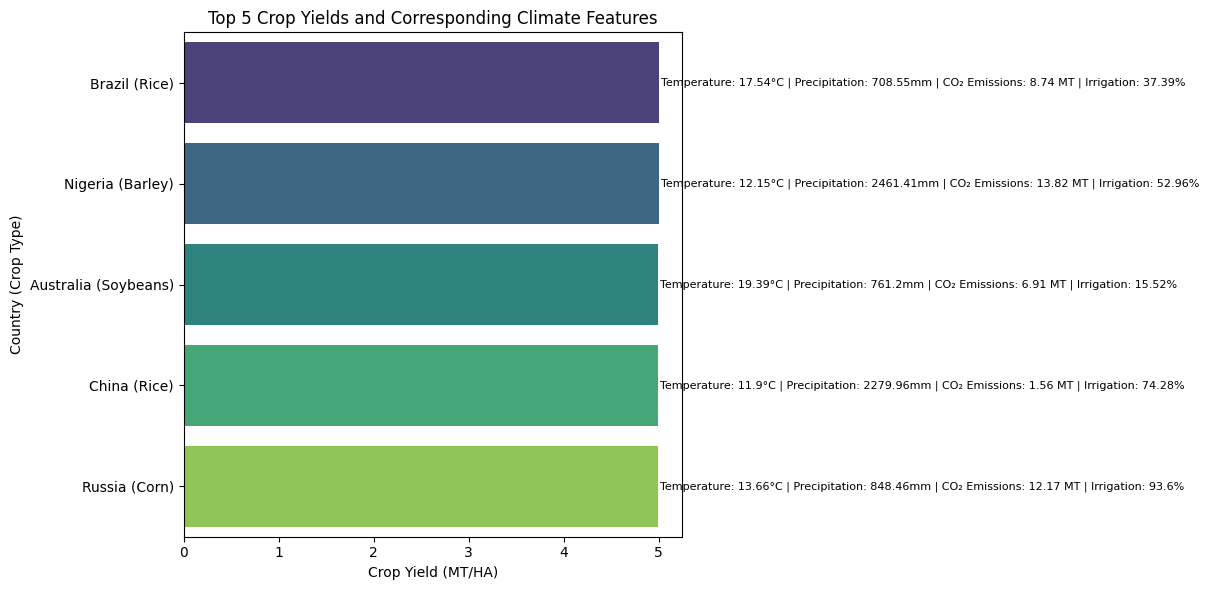

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#we'll create a dataframe including only the top 5countries with crop yield with respect to other features
top_yield_data = pd.DataFrame({
    'Country': ['Brazil', 'Nigeria', 'Australia', 'China', 'Russia'],
    'Crop_Type': ['Rice', 'Barley', 'Soybeans', 'Rice', 'Corn'],
    'Crop_Yield_MT_per_HA': [5.00, 5.00, 4.99, 4.99, 4.99],
    'Average_Temperature_C': [17.54, 12.15, 19.39, 11.90, 13.66],
    'Total_Precipitation_mm': [708.55, 2461.41, 761.20, 2279.96, 848.46],
    'CO2_Emissions_MT': [8.74, 13.82, 6.91, 1.56, 12.17],
    'Irrigation_Access_%': [37.39, 52.96, 15.52, 74.28, 93.60]
})


top_yield_data['Label'] = top_yield_data['Country'] + ' (' + top_yield_data['Crop_Type'] + ')'

#plot the dataframe
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Crop_Yield_MT_per_HA', y='Label', data=top_yield_data, palette='viridis')
plt.title("Top 5 Crop Yields and Corresponding Climate Features")
plt.xlabel("Crop Yield (MT/HA)")
plt.ylabel("Country (Crop Type)")

#show the values of the features with resoect to the country and crop type
for i, row in top_yield_data.iterrows():
    text = (
        f"Temperature: {row['Average_Temperature_C']}°C | "
        f"Precipitation: {row['Total_Precipitation_mm']}mm | "
        f"CO₂ Emissions: {row['CO2_Emissions_MT']} MT | "
        f"Irrigation: {row['Irrigation_Access_%']}%"
    )
    ax.text(
        row['Crop_Yield_MT_per_HA'] + 0.02,
        i,
        text,
        va='center',
        fontsize=8,
        color='black'
    )

plt.tight_layout()
plt.show()


In this step, I identified the year with the highest crop yield for each crop type in every country by grouping the dataset by country and crop type, and extracting the maximum yield values. The resulting table highlights the best-performing year for each crop, along with the environmental and agricultural conditions during that period. For instance, in Argentina, barley reached its peak yield of 4.63 MT/HA in 2018 in the Northwest region, under moderate temperature and rainfall levels. This analysis helps reveal the conditions under which each crop thrived the most, offering insights into favorable climate patterns, resource availability, and possibly effective adaptation strategies that supported optimal productivity.










**A simple plot showing the top 10 countries with highest crop production**

<ipython-input-109-b5a6a6882128>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Crop_Yield_MT_per_HA', y='Country', data=top_yield, palette='Set2')


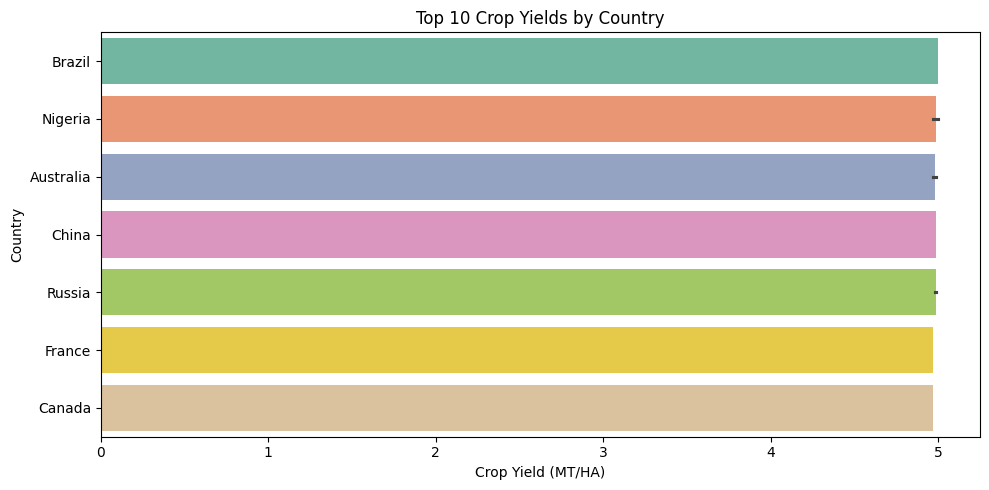

In [ ]:
#Insight: See which regions, crops, or years had the best yield—then investigate which climate or soil conditions contributed.
import seaborn as sns
import matplotlib.pyplot as plt

top_yield = cropsdata.sort_values(by='Crop_Yield_MT_per_HA', ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x='Crop_Yield_MT_per_HA', y='Country', data=top_yield, palette='Set2')
plt.title("Top 10 Crop Yields by Country")
plt.xlabel("Crop Yield (MT/HA)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


☀️ 2. High temperature or CO₂ with high yield?


**In this step, the dataset was sorted to analyze which regions with high temperatures also achieved high crop yields. By sorting the data first by Average_Temperature_C (in descending order) and then by Crop_Yield_MT_per_HA (also descending), the goal was to identify the crops that managed to achieve high yields under warmer climates. This helps assess how temperature influences crop productivity and whether high temperatures correlate with better yields or whether other factors like soil health, adaptation strategies, and irrigation access play a more significant role.**

In [ ]:
cropsdata.sort_values(by=['Average_Temperature_C', 'Crop_Yield_MT_per_HA'], ascending=[False, False]).head(10)

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,...,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD,Latitude,Longitude,Temp_Anomaly,Precip_Anomaly,PET_approx,Aridity_Index
8310,1991,France,Provence-Alpes-Cote d’Azur,Fruits,35.00,2768.25,6.01,3.050,5,23.73,...,63.27,77.25,No Adaptation,450.25,46.227638,2.213749,19.758701,1156.586166,330.545511,8.374792
7208,1993,France,Provence-Alpes-Cote d’Azur,Wheat,34.99,1628.27,5.77,3.090,7,94.35,...,62.36,60.70,Crop Rotation,454.91,46.227638,2.213749,19.748701,16.606166,330.426780,4.927779
8907,2007,Canada,Ontario,Rice,34.99,2031.07,22.01,1.737,7,49.86,...,99.12,83.83,Crop Rotation,577.78,56.130366,-106.346771,19.748701,419.406166,401.209685,5.062365
5222,1994,USA,Northeast,Sugarcane,34.98,497.36,10.08,2.331,3,18.19,...,59.26,48.75,Organic Farming,359.29,37.090240,-95.712891,19.738701,-1114.303834,265.019069,1.876695
2212,2010,China,East,Barley,34.98,1654.43,2.48,2.210,7,16.51,...,66.20,53.30,Organic Farming,998.05,35.861660,104.195397,19.738701,42.766166,256.240556,6.456550
627,2019,Canada,British Columbia,Soybeans,34.98,616.50,15.77,1.971,3,96.46,...,9.98,76.39,No Adaptation,690.87,56.130366,-106.346771,19.738701,-995.163834,401.065545,1.537155
6426,2009,Nigeria,South West,Soybeans,34.98,1167.97,24.28,1.557,5,93.02,...,81.93,73.62,No Adaptation,596.99,9.081999,8.675277,19.738701,-443.693834,64.893161,17.998353
2189,1993,Russia,Central,Vegetables,34.97,2429.70,8.12,3.860,9,63.57,...,64.40,85.07,Crop Rotation,733.19,61.524010,105.318756,19.728701,818.036166,439.446522,5.529000
1883,1997,Brazil,North,Cotton,34.97,665.03,13.08,3.080,0,60.85,...,46.18,86.93,Drought-resistant Crops,810.22,-14.235004,-51.925280,19.728701,-946.633834,101.676126,6.540670
4190,2006,India,Punjab,Vegetables,34.97,963.87,18.28,2.556,4,83.66,...,21.74,38.71,Organic Farming,1008.10,20.593684,78.962880,19.728701,-647.793834,147.094164,6.552741


**A simple plot to demonstrate the crop yield in the countries with the highest temperatures based on crop type**

<ipython-input-111-53a5e72ee96e>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Crop_Yield_MT_per_HA', y='Label', data=hot_yield_data, palette='coolwarm')


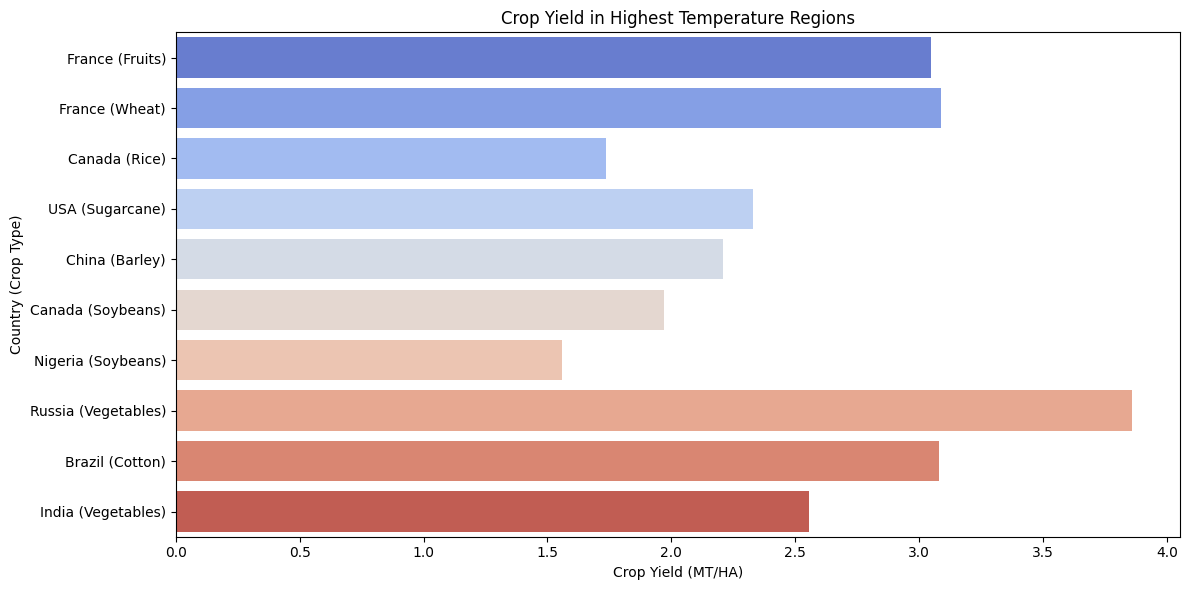

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

hot_yield_data = pd.DataFrame({
    'Country': ['France', 'France', 'Canada', 'USA', 'China', 'Canada', 'Nigeria', 'Russia', 'Brazil', 'India'],
    'Crop_Type': ['Fruits', 'Wheat', 'Rice', 'Sugarcane', 'Barley', 'Soybeans', 'Soybeans', 'Vegetables', 'Cotton', 'Vegetables'],
    'Average_Temperature_C': [35.00, 34.99, 34.99, 34.98, 34.98, 34.98, 34.98, 34.97, 34.97, 34.97],
    'Total_Precipitation_mm': [2768.25, 1628.27, 2031.07, 497.36, 1654.43, 616.50, 1167.97, 2429.70, 665.03, 963.87],
    'CO2_Emissions_MT': [6.01, 5.77, 22.01, 10.08, 2.48, 15.77, 24.28, 8.12, 13.08, 18.28],
    'Crop_Yield_MT_per_HA': [3.05, 3.09, 1.737, 2.331, 2.21, 1.971, 1.557, 3.86, 3.08, 2.556],
    'Irrigation_Access_%': [23.73, 94.35, 49.86, 18.19, 16.51, 96.46, 93.02, 63.57, 60.85, 83.66]
})

# Add label combining country and crop
hot_yield_data['Label'] = hot_yield_data['Country'] + ' (' + hot_yield_data['Crop_Type'] + ')'

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Crop_Yield_MT_per_HA', y='Label', data=hot_yield_data, palette='coolwarm')
plt.title("Crop Yield in Highest Temperature Regions")
plt.xlabel("Crop Yield (MT/HA)")
plt.ylabel("Country (Crop Type)")

plt.tight_layout()
plt.show()


💰 3. Top economic impact producers

**In this step, we sorted the dataset by Economic_Impact_Million_USD to identify the regions contributing the most to the economy based on agricultural output. By focusing on the economic impact of different crops, we aimed to determine which crops and regions generate the highest economic value, even if the crop yields may not be the highest. This step helps in understanding the broader economic significance of agriculture, as higher economic impact may result from factors like crop prices, export potential, or the scale of production.**

In [ ]:
cropsdata.sort_values(by='Economic_Impact_Million_USD', ascending=False).head()

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,...,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD,Latitude,Longitude,Temp_Anomaly,Precip_Anomaly,PET_approx,Aridity_Index
4704,1998,India,Punjab,Sugarcane,19.92,1248.01,6.12,4.96,6,67.09,...,64.61,83.45,Organic Farming,2346.47,20.593684,78.962880,4.678701,-363.653834,78.254203,15.948153
6763,2015,Russia,Siberian,Barley,13.95,2110.20,4.59,4.80,4,82.51,...,29.67,51.47,Crop Rotation,2312.29,61.524010,105.318756,-1.291299,498.536166,169.962277,12.415696
3272,2017,India,Tamil Nadu,Wheat,16.79,1129.95,7.60,4.89,2,77.84,...,55.90,89.26,Water Management,2300.00,20.593684,78.962880,1.548701,-481.713834,66.632578,16.957921
8683,2012,Nigeria,South West,Sugarcane,14.66,1709.32,14.35,4.85,1,15.88,...,79.93,30.48,Organic Farming,2285.25,9.081999,8.675277,-0.581299,97.656166,26.131811,65.411463
4956,2019,Australia,Victoria,Sugarcane,11.64,2645.95,13.42,4.97,3,97.85,...,76.63,30.59,Organic Farming,2272.63,-25.274398,133.775136,-3.601299,1034.286166,60.788219,43.527349


<ipython-input-113-2c18799976c0>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Crop_Yield_MT_per_HA', y='Label', data=economic_data, palette='crest')


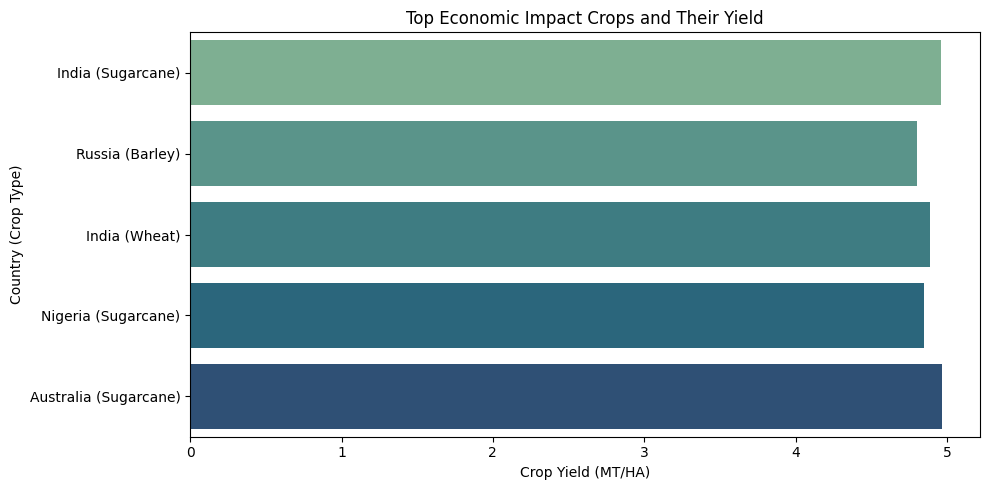

In [ ]:
economic_data = pd.DataFrame({
    'Country': ['India', 'Russia', 'India', 'Nigeria', 'Australia'],
    'Region': ['Punjab', 'Siberian', 'Tamil Nadu', 'South West', 'Victoria'],
    'Crop_Type': ['Sugarcane', 'Barley', 'Wheat', 'Sugarcane', 'Sugarcane'],
    'Crop_Yield_MT_per_HA': [4.96, 4.80, 4.89, 4.85, 4.97],
    'Average_Temperature_C': [19.92, 13.95, 16.79, 14.66, 11.64],
    'Total_Precipitation_mm': [1248.01, 2110.20, 1129.95, 1709.32, 2645.95],
    'CO2_Emissions_MT': [6.12, 4.59, 7.60, 14.35, 13.42],
    'Irrigation_Access_%': [67.09, 82.51, 77.84, 15.88, 97.85],
    'Economic_Impact_Million_USD':[2346.47,2312.29,2300.00,2285.25,2272.63]
})


economic_data['Label'] = economic_data['Country'] + ' (' + economic_data['Crop_Type'] + ')'


plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Crop_Yield_MT_per_HA', y='Label', data=economic_data, palette='crest')
plt.title("Top Economic Impact Crops and Their Yield")
plt.xlabel("Crop Yield (MT/HA)")
plt.ylabel("Country (Crop Type)")
plt.tight_layout()
plt.show()

💧 4. Low irrigation access but high yield

**In this step, we filtered the dataset to identify regions with high crop yields (above 2 MT/HA) despite having minimal irrigation access. By sorting the data based on the Irrigation_Access_% column and selecting the top 10 results, we aimed to highlight locations that achieve efficient or sustainable agricultural output without heavily relying on artificial irrigation. This could suggest the use of alternative strategies like favorable climate, organic farming, drought-resistant crops, or effective soil management practices. These insights can be valuable in identifying models of resilient agriculture under water-scarce conditions.**

In [ ]:
#Insight: Which regions achieve good yields with minimal irrigation? Could point to sustainable or efficient practices.
cropsdata[cropsdata['Crop_Yield_MT_per_HA'] > 2].sort_values(by='Irrigation_Access_%').head(10)
#Irrigation access means how much farmland has access to artificial water sources (like canals, sprinklers, pipes) instead of only depending on rain.



,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,...,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD,Latitude,Longitude,Temp_Anomaly,Precip_Anomaly,PET_approx,Aridity_Index
7998,2005,France,Ile-de-France,Sugarcane,33.10,1618.75,25.94,2.835,2,10.01,...,42.64,49.54,Organic Farming,829.66,46.227638,2.213749,17.858701,7.086166,308.368329,5.249404
1900,2014,Argentina,Patagonia,Vegetables,31.03,1377.47,17.43,2.817,3,10.01,...,14.25,62.07,Crop Rotation,1012.58,-38.416097,-63.616672,15.788701,-234.193834,236.907736,5.814373
1847,1990,Nigeria,South West,Soybeans,18.63,281.45,7.59,4.275,3,10.04,...,40.18,82.79,Crop Rotation,1798.09,9.081999,8.675277,3.388701,-1330.213834,32.348903,8.700450
3862,1997,Argentina,Northeast,Vegetables,30.14,1727.17,0.70,2.180,5,10.05,...,66.15,83.87,Drought-resistant Crops,377.52,-38.416097,-63.616672,14.898701,115.506166,228.819844,7.548165
6586,2017,Australia,Victoria,Coffee,16.03,457.53,5.47,3.996,2,10.07,...,7.75,79.38,Crop Rotation,1904.53,-25.274398,133.775136,0.788701,-1154.133834,78.486034,5.829445
1620,1999,India,Tamil Nadu,Fruits,24.88,2469.16,18.25,3.186,8,10.07,...,91.80,92.40,Organic Farming,535.56,20.593684,78.962880,9.638701,857.496166,98.571187,25.049511
6775,2008,Brazil,Southeast,Coffee,31.93,1476.60,13.19,3.860,3,10.07,...,11.00,80.71,Crop Rotation,1569.89,-14.235004,-51.925280,16.688701,-135.063834,90.869034,16.249760
2690,2006,Argentina,Patagonia,Vegetables,27.36,2759.74,7.39,2.780,8,10.07,...,69.51,92.32,No Adaptation,1356.38,-38.416097,-63.616672,12.118701,1148.076166,204.458010,13.497833
3301,2008,Canada,Ontario,Vegetables,13.73,783.76,13.54,3.110,8,10.10,...,32.69,94.69,Drought-resistant Crops,979.93,56.130366,-106.346771,-1.511299,-827.903834,153.092182,5.119530
8519,2001,USA,South,Corn,9.86,716.04,23.26,2.007,3,10.16,...,77.34,76.22,Water Management,402.97,37.090240,-95.712891,-5.381299,-895.623834,79.613136,8.993993


🌧️ 5. Extreme weather effect

**In this step, the dataset was sorted by the number of Extreme_Weather_Events to identify the regions most affected by adverse weather conditions. By sorting the data in descending order, we aimed to highlight regions facing frequent extreme weather events, such as droughts, floods, or storms. This insight helps analyze how extreme weather correlates with crop yield performance, economic losses, and the effectiveness of adaptation strategies like irrigation access, crop rotation, or drought-resistant crops. Understanding these correlations is crucial for planning sustainable agricultural practices and mitigating the effects of climate change.**

In [ ]:
cropsdata.sort_values(by='Extreme_Weather_Events', ascending=False).head(10)
#Insight: Find the regions facing the most weather events. Then correlate with yield or economic loss.


,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,...,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD,Latitude,Longitude,Temp_Anomaly,Precip_Anomaly,PET_approx,Aridity_Index
2014,1996,Nigeria,North West,Sugarcane,17.72,2626.04,3.70,4.970,10,99.29,...,14.40,84.35,Water Management,1154.81,9.081999,8.675277,2.478701,1014.376166,30.865660,85.079663
697,1998,Argentina,Pampas,Rice,19.43,1343.07,12.08,3.220,10,73.83,...,79.45,89.94,Crop Rotation,1413.62,-38.416097,-63.616672,4.188701,-268.593834,142.469630,9.427062
59,1998,India,Punjab,Sugarcane,16.81,689.70,8.01,3.220,10,40.50,...,5.94,97.76,No Adaptation,1036.85,20.593684,78.962880,1.568701,-921.963834,66.703891,10.339727
5816,2001,Brazil,South,Fruits,15.44,343.07,28.17,3.213,10,79.55,...,54.10,40.28,Organic Farming,947.11,-14.235004,-51.925280,0.198701,-1268.593834,42.791741,8.017201
3937,2019,China,East,Rice,4.65,1811.34,20.94,0.468,10,77.05,...,21.75,64.76,No Adaptation,169.96,35.861660,104.195397,-10.591299,199.676166,52.829481,34.286538
1290,1998,Argentina,Pampas,Vegetables,7.88,1547.44,25.31,0.450,10,76.84,...,90.21,98.30,Organic Farming,204.49,-38.416097,-63.616672,-7.361299,-64.223834,72.063705,21.473223
4084,2017,Canada,British Columbia,Wheat,1.71,2521.24,26.99,0.450,10,55.75,...,79.19,52.28,Water Management,111.90,56.130366,-106.346771,-13.531299,909.576166,64.454503,39.116584
3238,2019,Brazil,Northeast,Soybeans,2.84,1336.80,1.83,0.510,10,28.97,...,11.87,46.10,Water Management,109.39,-14.235004,-51.925280,-12.401299,-274.863834,18.056417,74.034622
3872,2021,Brazil,Northeast,Barley,11.27,2909.11,9.71,4.910,10,17.50,...,54.27,43.30,Crop Rotation,1231.90,-14.235004,-51.925280,-3.971299,1297.446166,33.454596,86.956961
8772,2007,Nigeria,South East,Rice,3.38,1029.01,28.93,0.513,10,76.59,...,94.38,47.04,Water Management,208.68,9.081999,8.675277,-11.861299,-582.653834,12.060383,85.321504


🧪 6. High pesticide use with low yield

**In this step, the dataset was sorted by Pesticide_Use_KG_per_HA and Crop_Yield_MT_per_HA to identify regions with high pesticide use but low crop yields. By sorting the data in descending order by pesticide use and ascending order by crop yield, we aimed to highlight areas where high levels of pesticide application did not correlate with high yields. This could suggest inefficiencies in pesticide use or the need for alternative farming practices. The analysis could be useful in identifying regions where pesticide management strategies, crop rotation, or organic farming could potentially improve yields**

In [ ]:
cropsdata.sort_values(by=['Pesticide_Use_KG_per_HA', 'Crop_Yield_MT_per_HA'], ascending=[False, True]).head(10)


,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,...,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD,Latitude,Longitude,Temp_Anomaly,Precip_Anomaly,PET_approx,Aridity_Index
8985,2022,China,East,Wheat,-0.33,1478.74,9.55,0.570,2,36.90,...,77.22,88.87,Crop Rotation,148.75,35.861660,104.195397,-15.571299,-132.923834,33.934546,43.576243
7581,2018,Canada,Ontario,Vegetables,18.98,2249.85,29.06,2.322,1,43.27,...,8.87,39.03,Water Management,570.09,56.130366,-106.346771,3.738701,638.186166,203.511803,11.055133
1814,2019,India,Punjab,Coffee,29.10,1814.37,22.75,3.006,0,74.65,...,46.46,95.00,Organic Farming,1132.98,20.593684,78.962880,13.858701,202.706166,117.691928,15.416265
6852,1999,China,East,Barley,9.01,2885.42,2.83,1.650,10,67.14,...,32.70,91.85,Water Management,792.57,35.861660,104.195397,-6.231299,1273.756166,72.730892,39.672551
7300,2015,France,Nouvelle-Aquitaine,Barley,31.78,2613.18,16.48,0.873,6,79.67,...,19.68,69.05,Crop Rotation,258.21,46.227638,2.213749,16.538701,1001.516166,293.412941,8.906151
6736,2005,India,Maharashtra,Cotton,16.46,395.99,17.54,2.565,4,28.80,...,16.53,65.25,Drought-resistant Crops,479.56,20.593684,78.962880,1.218701,-1215.673834,65.461376,6.049216
6786,2008,Russia,Central,Barley,11.36,1877.56,21.95,4.023,0,83.57,...,29.26,98.37,No Adaptation,937.52,61.524010,105.318756,-3.881299,265.896166,145.410541,12.912131
3044,2001,France,Nouvelle-Aquitaine,Rice,7.38,2042.27,10.13,0.680,3,53.68,...,83.23,64.08,No Adaptation,304.52,46.227638,2.213749,-7.861299,430.606166,83.690129,24.402758
6690,1991,China,South,Coffee,24.42,1829.70,19.93,1.827,4,49.75,...,86.36,41.68,Crop Rotation,405.45,35.861660,104.195397,9.178701,218.036166,168.199068,10.878182
2420,1997,France,Provence-Alpes-Cote d’Azur,Soybeans,14.42,2348.20,28.70,1.467,3,66.17,...,6.82,78.54,No Adaptation,575.61,46.227638,2.213749,-0.821299,736.536166,131.206047,17.897041


**Here, we included a bar graph to show how the use of high pesticides amounts would affect the production of certain crops types**

<ipython-input-117-e18f03425654>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Pesticide_Use_KG_per_HA', y='Label', data=pesticide_data, palette='rocket')


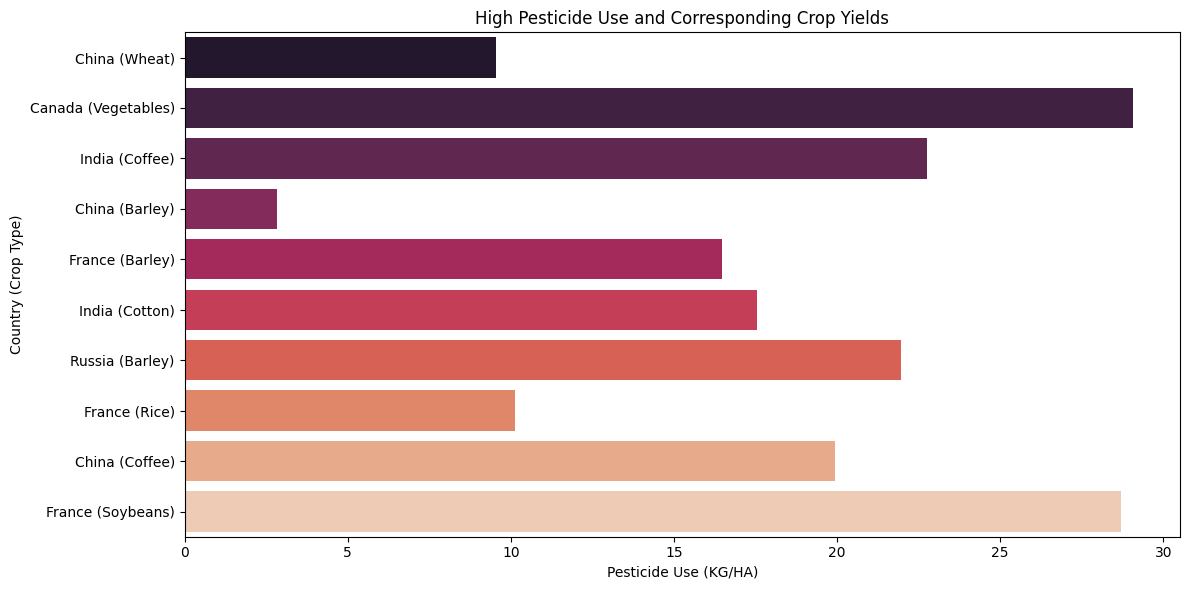

In [ ]:
pesticide_data = pd.DataFrame({
    'Country': ['China', 'Canada', 'India', 'China', 'France', 'India', 'Russia', 'France', 'China', 'France'],
    'Crop_Type': ['Wheat', 'Vegetables', 'Coffee', 'Barley', 'Barley', 'Cotton', 'Barley', 'Rice', 'Coffee', 'Soybeans'],
    'Pesticide_Use_KG_per_HA': [9.55, 29.06, 22.75, 2.83, 16.48, 17.54, 21.95, 10.13, 19.93, 28.70],
    'Crop_Yield_MT_per_HA': [0.57, 2.322, 3.006, 1.65, 0.873, 2.565, 4.023, 0.680, 1.827, 1.467],
    'Average_Temperature_C': [-0.33, 18.98, 29.10, 9.01, 31.78, 16.46, 11.36, 7.38, 24.42, 14.42],
    'Irrigation_Access_%': [36.90, 43.27, 74.65, 67.14, 79.67, 28.80, 83.57, 53.68, 49.75, 66.17]
})

# Add label
pesticide_data['Label'] = pesticide_data['Country'] + ' (' + pesticide_data['Crop_Type'] + ')'

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Pesticide_Use_KG_per_HA', y='Label', data=pesticide_data, palette='rocket')
plt.title("High Pesticide Use and Corresponding Crop Yields")
plt.xlabel("Pesticide Use (KG/HA)")
plt.ylabel("Country (Crop Type)")

plt.tight_layout()
plt.show()


🔄 7.Compare adaptation strategies

**In this analysis, we grouped the dataset by Adaptation Strategies and calculated the average crop yield for each strategy. The results were then visualized using a horizontal bar chart, which shows how different strategies like crop rotation, organic farming, and water management affect crop yields. By sorting the strategies in descending order of yield, we can easily identify which adaptation strategies lead to the highest agricultural productivity, providing insights into effective farming practices.**

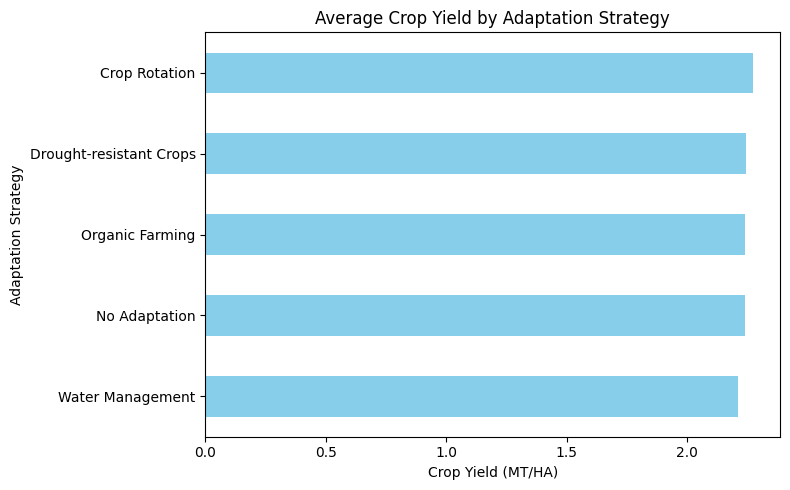

In [ ]:
# Group by adaptation strategy and compare yield
cropsdata.groupby('Adaptation_Strategies')['Crop_Yield_MT_per_HA'].mean().sort_values(ascending=False)
strategy_avg_yield = cropsdata.groupby('Adaptation_Strategies')['Crop_Yield_MT_per_HA'].mean().sort_values()

plt.figure(figsize=(8, 5))
strategy_avg_yield.plot(kind='barh', color='skyblue')
plt.title("Average Crop Yield by Adaptation Strategy")
plt.xlabel("Crop Yield (MT/HA)")
plt.ylabel("Adaptation Strategy")
plt.tight_layout()
plt.show()


In [ ]:
colu=['Year', 'Country', 'Region', 'Crop_Type', 'Average_Temperature_C',
       'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA',
       'Extreme_Weather_Events', 'Irrigation_Access_%',
       'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA',
       'Soil_Health_Index', 'Adaptation_Strategies',
       'Economic_Impact_Million_USD', 'Latitude', 'Longitude', 'Temp_Anomaly',
       'Precip_Anomaly', 'Aridity_Index', 'PET_approx']
print(cropsdata[colu].describe())


               Year  Average_Temperature_C  Total_Precipitation_mm  \
count  10000.000000           10000.000000            10000.000000   
mean    2007.088700              15.241299             1611.663834   
std       10.084245              11.466955              805.016815   
min     1990.000000              -4.990000              200.150000   
25%     1999.000000               5.430000              925.697500   
50%     2007.000000              15.175000             1611.160000   
75%     2016.000000              25.340000             2306.997500   
max     2024.000000              35.000000             2999.670000   

       CO2_Emissions_MT  Crop_Yield_MT_per_HA  Extreme_Weather_Events  \
count      10000.000000          10000.000000            10000.000000   
mean          15.246608              2.240017                4.980900   
std            8.589423              0.998342                3.165808   
min            0.500000              0.450000                0.000000   
25% 

In [ ]:
#pivot table representing the average climate factors and yield crops for each country
geo_pivot = pd.pivot_table(
    data=cropsdata,
    index='Country',
    values=[
        'Crop_Yield_MT_per_HA',
        'Average_Temperature_C',
        'Total_Precipitation_mm',
        'Aridity_Index',
        'CO2_Emissions_MT'
    ],
    aggfunc='mean'
)

geo_pivot_sorted=geo_pivot.sort_values('Crop_Yield_MT_per_HA', ascending=False)
geo_pivot_sorted

,Aridity_Index,Average_Temperature_C,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Total_Precipitation_mm
Country,,,,,
Nigeria,87.988672,14.765228,14.896569,2.279426,1595.659981
China,21.721437,15.708584,15.025538,2.260217,1649.425179
Argentina,19.560323,15.416799,15.368902,2.250341,1565.443679
India,40.155773,14.672878,15.075951,2.249558,1636.718263
USA,20.730884,15.675882,15.362510,2.238157,1616.469835
Australia,31.522846,15.181008,15.396909,2.232587,1594.679603
Brazil,53.214048,15.389227,15.020392,2.231443,1558.028750
Canada,14.290383,15.374309,15.641900,2.229325,1648.249929
France,17.115808,15.399335,15.467822,2.221425,1652.952607


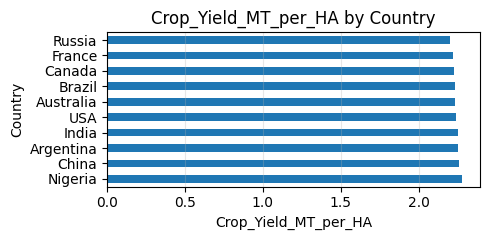

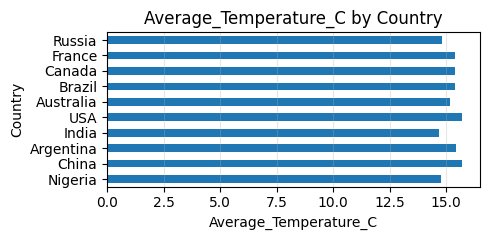

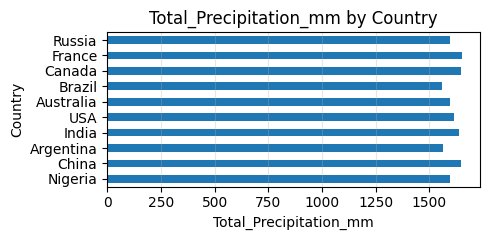

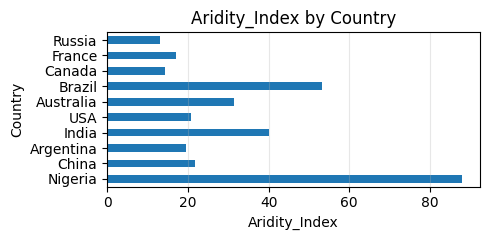

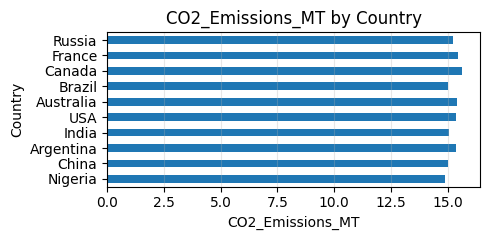

In [ ]:
#plotting a bar chart of the fields by country
for column in ['Crop_Yield_MT_per_HA', 'Average_Temperature_C', 'Total_Precipitation_mm', 'Aridity_Index','CO2_Emissions_MT']:
    plt.figure(figsize=(5, 2.5))  # Create a new figure for each chart
    geo_pivot_sorted[column].plot(kind='barh', title=f'{column} by Country')
    plt.xlabel(column)
    plt.ylabel('Country')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

#we can see that for the temperature, percipitation and CO2 emission is high and almost equal between the countries
#whereas the the drought index differs from one country to another
#despite the difference in drought most havee the same yield crop, that could be due to the adaption strategies applied
#by each country or their irrigation access

In [ ]:
geographicCorr = geo_pivot_sorted.corr()
geographicCorr
#from the pivot we calculate the correlation between the different fields
#there is a strong positive relation between yield crops and aridity index
#there is a moderate negative relation between yield crops and co2 emissions

,Aridity_Index,Average_Temperature_C,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Total_Precipitation_mm
Aridity_Index,1.000000,-0.476286,-0.723830,0.656870,-0.359370
Average_Temperature_C,-0.476286,1.000000,0.364283,-0.057306,0.140239
CO2_Emissions_MT,-0.723830,0.364283,1.000000,-0.559465,0.287789
Crop_Yield_MT_per_HA,0.656870,-0.057306,-0.559465,1.000000,-0.013463
Total_Precipitation_mm,-0.359370,0.140239,0.287789,-0.013463,1.000000


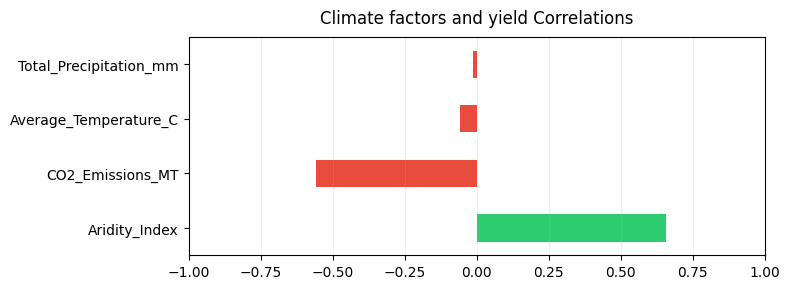

In [ ]:
#e wanted to plot the correlations of the previous pivot table for better visualization
yield_corr = geographicCorr['Crop_Yield_MT_per_HA'].drop('Crop_Yield_MT_per_HA').sort_values(key=abs, ascending=False)

plt.figure(figsize=(8, 3))
top_features = yield_corr.head(4)

colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in top_features.values]
top_features.plot(kind='barh', color=colors)

plt.title('Climate factors and yield Correlations', pad=10)
plt.xlim(-1, 1)
plt.grid(axis='x', alpha=0.2)
plt.tight_layout()
plt.show()

In [ ]:
filtered_columns = [
    "Country", "Crop_Yield_MT_per_HA", "Adaptation_Strategies",
    "Average_Temperature_C", "Total_Precipitation_mm", "CO2_Emissions_MT"
]
df_filtered = cropsdata[filtered_columns]

# Create pivot table
pivot = pd.pivot_table(
    df_filtered,
    index=["Country","Adaptation_Strategies"],
    values=["Crop_Yield_MT_per_HA", "Average_Temperature_C", "Total_Precipitation_mm", "CO2_Emissions_MT"],
    aggfunc="mean"
).reset_index()

pivot.head()



,Country,Adaptation_Strategies,Average_Temperature_C,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Total_Precipitation_mm
0,Argentina,Crop Rotation,16.304222,15.585667,2.296856,1592.586500
1,Argentina,Drought-resistant Crops,14.985990,14.655939,2.231360,1508.002284
2,Argentina,No Adaptation,14.407537,15.942709,2.270379,1724.308030
3,Argentina,Organic Farming,15.014490,14.642296,2.221464,1505.431939
4,Argentina,Water Management,16.420962,15.981250,2.235721,1497.862356


In [ ]:
yield_averages = cropsdata.groupby(['Country', 'Latitude', 'Longitude'])['Crop_Yield_MT_per_HA'].mean().reset_index()

max_yield = yield_averages['Crop_Yield_MT_per_HA'].max()
min_yield = yield_averages['Crop_Yield_MT_per_HA'].min()
yield_averages['bubble_size'] = np.interp(yield_averages['Crop_Yield_MT_per_HA'],
                                         [min_yield, max_yield],
                                         [5, 30])
m = folium.Map(location=[20, 0], zoom_start=2, tiles='CartoDB positron')

def yield_color(yield_val):
    percentile = (yield_val - min_yield) / (max_yield - min_yield)
    if percentile > 0.75: return '#1a9641'
    elif percentile > 0.5: return '#a6d96a'
    elif percentile > 0.25: return '#fdae61'
    else: return '#d7191c'

for idx, row in yield_averages.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=row['bubble_size'],
        color=yield_color(row['Crop_Yield_MT_per_HA']),
        weight=1,
        fill=True,
        fill_opacity=0.7,
        popup=folium.Popup(
            f"<b>{row['Country']}</b><br>"
            f"Avg Yield: {row['Crop_Yield_MT_per_HA']:.1f} MT/HA<br>"
            f"Coordinates: {row['Latitude']:.2f}, {row['Longitude']:.2f}",
            max_width=250
        )
    ).add_to(m)
m

In [ ]:
#we reated a dynamic bubble map that shows the distribution per country for these factors: yield crops, average temperature and aridity index
country_averages = cropsdata.groupby(['Country', 'Latitude', 'Longitude']).agg({
    'Crop_Yield_MT_per_HA': 'mean',
    #'Average_Temperature_C': 'mean',
    'Aridity_Index': 'mean',
    'CO2_Emissions_MT': 'mean'
}).reset_index()


m = folium.Map(location=[20, 0], zoom_start=2, tiles='CartoDB positron')
def normalize_size(values, min_size=5, max_size=30):
    min_val, max_val = values.min(), values.max()
    return np.interp(values, [min_val, max_val], [min_size, max_size])

def get_color(value, metric):
    if metric == 'Yield':
        percentile = (value - country_averages['Crop_Yield_MT_per_HA'].min()) / \
                   (country_averages['Crop_Yield_MT_per_HA'].max() - country_averages['Crop_Yield_MT_per_HA'].min())
        if percentile > 0.75: return '#1a9641'
        elif percentile > 0.5: return '#a6d96a'
        elif percentile > 0.25: return '#fdae61'
        else: return '#d7191c'
    elif metric == 'CO2':
        temp_percentile = (value - country_averages['CO2_Emissions_MT'].min()) / \
                         (country_averages['CO2_Emissions_MT'].max() - country_averages['CO2_Emissions_MT'].min())
        if temp_percentile > 0.75: return '#f02a2a'  # red (hottest 25%)
        elif temp_percentile > 0.5: return '#f07b2a'  # orange (50-75%)
        else: return '#4575b4'  # Blue (coolest 50%)

    else:  # Aridity index
        aridity_percentile = (value - country_averages['Aridity_Index'].min()) / \
                           (country_averages['Aridity_Index'].max() - country_averages['Aridity_Index'].min())
        if aridity_percentile < 0.25: return '#d7191c'  # Red (driest 25%)
        elif aridity_percentile < 0.5: return '#fdae61'  # Orange (25-50%)
        else: return '#1a9641'  # Green (wettest)


  #  elif metric == 'Temperature':
   #     temp_percentile = (value - country_averages['Average_Temperature_C'].min()) / \
    #                     (country_averages['Average_Temperature_C'].max() - country_averages['Average_Temperature_C'].min())
     #   if temp_percentile > 0.75: return '#f02a2a'  # Red (hottest 25%)
      #  elif temp_percentile > 0.5: return '#f07b2a'  # Orange (50-75%)
       # else: return '#4575b4'  # Blue (coolest 50%)

yield_layer = folium.FeatureGroup(name='Yield', show=True)
#temp_layer = folium.FeatureGroup(name='Temperature', show=False)
aridity_layer = folium.FeatureGroup(name='Aridity', show=False)
co2_layer = folium.FeatureGroup(name='CO2 Emissions', show=False)

for idx, row in country_averages.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=normalize_size(country_averages['Crop_Yield_MT_per_HA'])[idx],
        color=get_color(row['Crop_Yield_MT_per_HA'], 'Yield'),
        fill=True,
        fill_opacity=0.7,
        popup=f"<b>{row['Country']}</b><br>Yield: {row['Crop_Yield_MT_per_HA']:.1f} MT/HA"
    ).add_to(yield_layer)

 #   folium.CircleMarker(
  #      location=[row['Latitude'], row['Longitude']],
   #     radius=normalize_size(country_averages['Average_Temperature_C'])[idx],
    #    color=get_color(row['Average_Temperature_C'], 'Temperature'),
     #   fill=True,
      #  fill_opacity=0.7,
       # popup=f"<b>{row['Country']}</b><br>Temp: {row['Average_Temperature_C']:.1f}°C"
    #).add_to(temp_layer)

    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=normalize_size(country_averages['Aridity_Index'])[idx],
        color=get_color(row['Aridity_Index'], 'Aridity'),
        fill=True,
        fill_opacity=0.7,
        popup=f"<b>{row['Country']}</b><br>Aridity Index: {row['Aridity_Index']:.2f}"
    ).add_to(aridity_layer)

    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=normalize_size(country_averages['CO2_Emissions_MT'])[idx],
        color=get_color(row['CO2_Emissions_MT'], 'CO2'),
        fill=True,
        fill_opacity=0.7,
        popup=f"<b>{row['Country']}</b><br>CO2 Emissions: {row['CO2_Emissions_MT']:.2f} MT"
    ).add_to(co2_layer)

yield_layer.add_to(m)
#temp_layer.add_to(m)
aridity_layer.add_to(m)
co2_layer.add_to(m)

folium.LayerControl(collapsed=False).add_to(m)
m

**Feature Engineering**

Outlier engeneering

In [ ]:
upper_limit = cropsdata['Economic_Impact_Million_USD'].quantile(0.99)
cropsdata['Economic_Impact_Million_USD'] = np.where(
    cropsdata['Economic_Impact_Million_USD'] > upper_limit,
    upper_limit,
    cropsdata['Economic_Impact_Million_USD']
)

cropsdata['Aridity_Index_log'] = np.log1p(cropsdata['Aridity_Index'])

*Data transformation*

In [ ]:
#one hot-encoding for crop_type and adaption strategies
cropsdata = pd.get_dummies(
    cropsdata,
    columns=['Crop_Type', 'Adaptation_Strategies'],
    drop_first=True
)
print(cropsdata.head())

      Year    Country           Region  Average_Temperature_C  \
3629  1994    Nigeria       South East                  12.15   
9864  2020     Brazil        Southeast                  17.54   
8611  2011  Australia  New South Wales                  19.39   
8700  1993      China             East                  11.90   
9187  2018     Russia         Siberian                  13.66   

      Total_Precipitation_mm  CO2_Emissions_MT  Crop_Yield_MT_per_HA  \
3629                 2461.41             13.82                  5.00   
9864                  708.55              8.74                  5.00   
8611                  761.20              6.91                  4.99   
8700                 2279.96              1.56                  4.99   
9187                  848.46             12.17                  4.99   

      Extreme_Weather_Events  Irrigation_Access_%  Pesticide_Use_KG_per_HA  \
3629                       4                52.96                    39.65   
9864                

Data normalization

In [ ]:
#we are normalizing the data for the numerical columns
#for the unbounded data we used a standard scaler

# List of continuous columns to normalize
continuous_cols = [
    'Average_Temperature_C', 'Total_Precipitation_mm',
    'CO2_Emissions_MT', 'Temp_Anomaly', 'Precip_Anomaly',
    'Aridity_Index' ,'PET_approx'
]

# Normalize
scaler = StandardScaler()
cropsdata[continuous_cols] = scaler.fit_transform(cropsdata[continuous_cols])

std_cols = ['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Temp_Anomaly', 'Precip_Anomaly']
cropsdata[std_cols] = StandardScaler().fit_transform(cropsdata[std_cols])

#for the bounded data we used a minmax scaler
minmax_cols = ['Soil_Health_Index','Irrigation_Access_%']
cropsdata[minmax_cols] = MinMaxScaler().fit_transform(cropsdata[minmax_cols])


In [ ]:
cropsdata.columns

Index(['Year', 'Country', 'Region', 'Average_Temperature_C',
       'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA',
       'Extreme_Weather_Events', 'Irrigation_Access_%',
       'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA',
       'Soil_Health_Index', 'Economic_Impact_Million_USD', 'Latitude',
       'Longitude', 'Temp_Anomaly', 'Precip_Anomaly', 'PET_approx',
       'Aridity_Index', 'Aridity_Index_log', 'Crop_Type_Coffee',
       'Crop_Type_Corn', 'Crop_Type_Cotton', 'Crop_Type_Fruits',
       'Crop_Type_Rice', 'Crop_Type_Soybeans', 'Crop_Type_Sugarcane',
       'Crop_Type_Vegetables', 'Crop_Type_Wheat',
       'Adaptation_Strategies_Drought-resistant Crops',
       'Adaptation_Strategies_No Adaptation',
       'Adaptation_Strategies_Organic Farming',
       'Adaptation_Strategies_Water Management'],
      dtype='object')

**Data augmentation**

In [ ]:
#adding Gaussian noise
#to simulate small, realistic variations in climate/soil data to improve model robustness
augmented = cropsdata.copy()
noise_scale = 0.05

num_cols = cropsdata.select_dtypes(include=['float64', 'int64']).columns
num_cols = num_cols.drop(['Crop_Yield_MT_per_HA', 'Year'], errors='ignore')

for col in num_cols:
    augmented[col] = augmented[col] * (1 + np.random.normal(0, noise_scale, len(augmented)))

cropsdata = pd.concat([cropsdata, augmented])


In [ ]:
# simulate +1°C and -10% precipitation to generate 2 scenarios: a warm and a dry weather
# it quantifies yield risks under different climate scenarios
scenarios = {
    'warming': {'Average_Temperature_C': 1.0, 'Total_Precipitation_mm': -0.10},
    'drying': {'Average_Temperature_C': 0.5, 'Total_Precipitation_mm': -0.20}
}

simul_scenario = pd.DataFrame()

for scenario_name, changes in scenarios.items():
    df_scenario = cropsdata.copy()
    for col, delta in changes.items():
        df_scenario[col] = df_scenario[col] * (1 + delta)

    df_scenario['Scenario'] = scenario_name

    cols_to_keep = ['Country', 'Average_Temperature_C', 'Total_Precipitation_mm', 'Scenario']
    df_scenario = df_scenario[cols_to_keep]
    simul_scenario = pd.concat([simul_scenario, df_scenario])

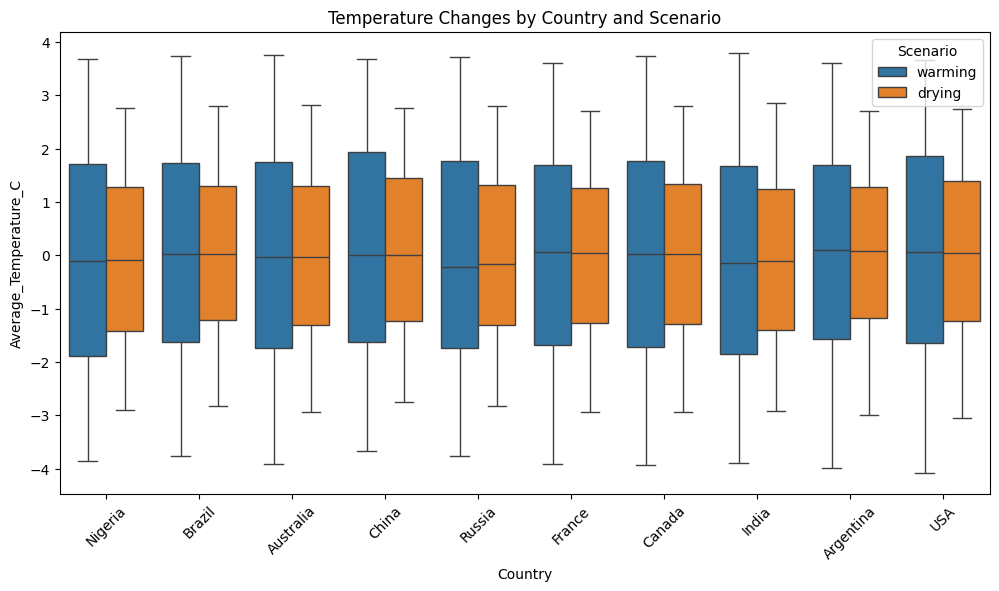

In [ ]:
#we are presenting the 2 scenarios classifying each entry according to temperature and precipitation
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=simul_scenario,
    x='Country',
    y='Average_Temperature_C',
    hue='Scenario'
)
plt.title('Temperature Changes by Country and Scenario')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#geogrpahic interpolation
#we projected future climate for synthetic data
#its used to balance regional representation.
cropsdata['is_synthetic'] = False

for region in cropsdata['Region'].unique():
    region_data = cropsdata[cropsdata['Region'] == region]
    synthetic = region_data.sample(frac=0.2).copy()

    synthetic['Average_Temperature_C'] = region_data['Average_Temperature_C'].mean() + 2.0
    synthetic['Aridity_Index'] = region_data['Aridity_Index'].mean() * 0.9

    synthetic['is_synthetic'] = True  # Set to True for synthetic data
    synthetic['Year'] = 2050
    cropsdata = pd.concat([cropsdata, synthetic])

# Now you can access the synthetic data using:
synthetic_data = cropsdata[cropsdata['is_synthetic'] == True]

#print(synthetic_data[['Country', 'Average_Temperature_C', 'Aridity_Index']])
cropsdata[cropsdata['is_synthetic']==True].head()

,Year,Country,Region,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,...,Crop_Type_Rice,Crop_Type_Soybeans,Crop_Type_Sugarcane,Crop_Type_Vegetables,Crop_Type_Wheat,Adaptation_Strategies_Drought-resistant Crops,Adaptation_Strategies_No Adaptation,Adaptation_Strategies_Organic Farming,Adaptation_Strategies_Water Management,is_synthetic
8685,2050,Nigeria,South East,1.969077,-1.832457,-1.441516,1.125,0.988672,0.877956,44.702695,...,True,False,False,False,False,False,True,False,False,True
2621,2050,Nigeria,South East,1.969077,-1.233699,0.747536,1.593,3.034659,0.599073,20.821764,...,True,False,False,False,False,True,False,False,False,True
3331,2050,Nigeria,South East,1.969077,0.169961,-1.029254,2.030,9.076321,0.777959,28.537691,...,False,False,False,False,False,False,False,False,False,True
1921,2050,Nigeria,South East,1.969077,-0.291677,-0.999909,2.970,0.000000,0.474421,20.472204,...,False,False,True,False,False,False,False,True,False,True
1573,2050,Nigeria,South East,1.969077,0.949547,-1.650337,3.520,8.731569,0.541430,21.439406,...,True,False,False,False,False,False,False,False,True,True


In [ ]:
cropsdata.head(10)

,Year,Country,Region,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,...,Crop_Type_Rice,Crop_Type_Soybeans,Crop_Type_Sugarcane,Crop_Type_Vegetables,Crop_Type_Wheat,Adaptation_Strategies_Drought-resistant Crops,Adaptation_Strategies_No Adaptation,Adaptation_Strategies_Organic Farming,Adaptation_Strategies_Water Management,is_synthetic
3629,1994,Nigeria,South East,-0.269597,1.055616,-0.166097,5.00,4.0,0.477328,39.65,...,False,False,False,False,False,False,False,True,False,False
9864,2020,Brazil,Southeast,0.200473,-1.121913,-0.757552,5.00,9.0,0.304290,21.04,...,True,False,False,False,False,False,False,False,True,False
8611,2011,Australia,New South Wales,0.361814,-1.056508,-0.970615,4.99,3.0,0.061236,30.53,...,False,True,False,False,False,False,True,False,False,False
8700,1993,China,East,-0.291400,0.830206,-1.593505,4.99,7.0,0.714270,20.75,...,True,False,False,False,False,False,False,False,False,False
9187,2018,Russia,Siberian,-0.137907,-0.948107,-0.358204,4.99,8.0,0.928984,9.48,...,False,False,False,False,False,True,False,False,False,False
4235,1993,Russia,Northwestern,0.100180,0.476382,-0.440867,4.98,8.0,0.743721,29.82,...,False,False,False,True,False,False,False,True,False,False
9011,2015,Australia,Victoria,-0.044591,1.341662,-0.995065,4.97,6.0,0.793287,6.36,...,False,False,False,False,False,True,False,False,False,False
8717,2008,France,Grand Est,0.173438,1.516201,-0.446689,4.97,3.0,0.629918,48.36,...,False,False,False,False,True,False,False,True,False,False
2014,1996,Nigeria,North West,0.216171,1.260131,-1.344349,4.97,10.0,0.992220,30.27,...,False,False,True,False,False,False,False,False,True,False
5765,1995,Canada,Quebec,-0.164071,0.278985,-0.143976,4.97,4.0,0.273839,13.57,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
cropsdata.isnull().sum()

,0
Year,0
Country,0
Region,0
Average_Temperature_C,0
Total_Precipitation_mm,0
CO2_Emissions_MT,0
Crop_Yield_MT_per_HA,0
Extreme_Weather_Events,0
Irrigation_Access_%,0
Pesticide_Use_KG_per_HA,0


In [ ]:
cropsdata = cropsdata.reset_index().sort_values(by=['index']).set_index('index')
cropsdata

,Year,Country,Region,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,...,Crop_Type_Rice,Crop_Type_Soybeans,Crop_Type_Sugarcane,Crop_Type_Vegetables,Crop_Type_Wheat,Adaptation_Strategies_Drought-resistant Crops,Adaptation_Strategies_No Adaptation,Adaptation_Strategies_Organic Farming,Adaptation_Strategies_Water Management,is_synthetic
index,,,,,,,,,,,,,,,,,,,,,
0,2001,India,West Bengal,-1.097383,-1.486506,-0.002934,1.737,7.879771,0.049463,10.382852,...,False,False,False,False,False,False,False,False,True,False
0,2050,India,West Bengal,2.015308,-1.446755,-0.003098,1.737,8.000000,0.050345,10.080000,...,False,False,False,False,False,False,False,False,True,True
0,2001,India,West Bengal,-1.194038,-1.446755,-0.003098,1.737,8.000000,0.050345,10.080000,...,False,False,False,False,False,False,False,False,True,False
1,2024,China,North,-1.098978,1.582394,1.612749,1.737,7.861365,0.010702,31.109122,...,False,False,False,False,False,False,False,False,False,False
1,2024,China,North,-1.047523,1.617322,1.696752,1.737,8.000000,0.011558,33.060000,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,2000,Argentina,Patagonia,1.454574,-1.557690,1.253161,1.161,10.000000,0.761503,11.940000,...,False,False,False,False,False,False,False,False,True,False
9998,1996,Brazil,Southeast,-0.113908,-0.076452,0.245233,3.348,2.223036,0.361382,40.486087,...,False,True,False,False,False,False,False,False,False,False
9998,1996,Brazil,Southeast,-0.112616,-0.077200,0.240237,3.348,2.000000,0.362747,44.710000,...,False,True,False,False,False,False,False,False,False,False


**Modeling**

In [ ]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
# Define independent features (X) and target (y)
X = cropsdata[['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT','Irrigation_Access_%','Extreme_Weather_Events','Pesticide_Use_KG_per_HA','Fertilizer_Use_KG_per_HA','Soil_Health_Index']]  # You can add more features here
y = cropsdata['Crop_Yield_MT_per_HA']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mean Squared Error: 0.6865710772335403
R-squared: 0.30660381984454976

🔹 Random Forest
Train R²: 0.9369465713600907
Train MSE: 0.06303972606594793
Test R²: 0.540019900712772
Test MSE: 0.4554525123037492


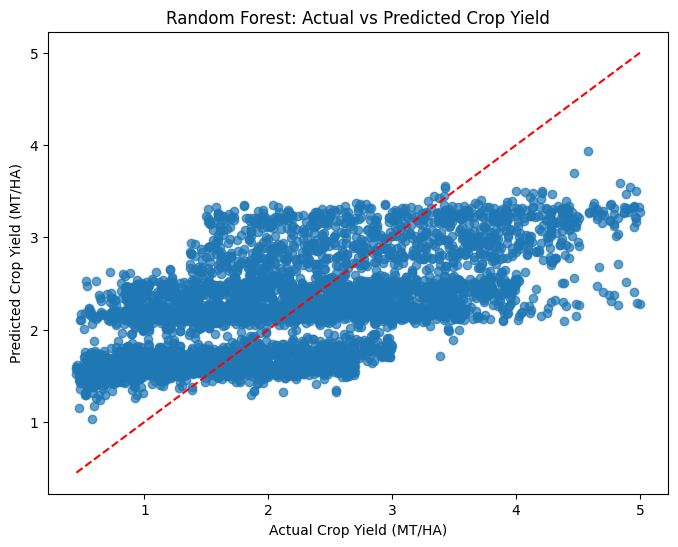

In [ ]:
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=1000,max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print("\n🔹 Random Forest")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf_test = rf_model.predict(X_test)
y_pred_rf_train = rf_model.predict(X_train)

print("Train R²:", r2_score(y_train, y_pred_rf_train))
print("Train MSE:", mean_squared_error(y_train, y_pred_rf_train))
print("Test R²:", r2_score(y_test, y_pred_rf_test))
print("Test MSE:", mean_squared_error(y_test, y_pred_rf_test))


plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Crop Yield (MT/HA)")
plt.ylabel("Predicted Crop Yield (MT/HA)")
plt.title("Random Forest: Actual vs Predicted Crop Yield")
plt.show()


XGBoost R² Score: 0.5865236883198841
XGBoost MSE: 0.40940646176782486
🔹 XGBoost
Train R²: 0.9999907751606464
Train MSE: 9.222834640329175e-06
Test R²: 0.5865236883198841
Test MSE: 0.40940646176782486


<ipython-input-142-a53b15a9b4a2>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Importance', data=feat_df, palette=color_list)


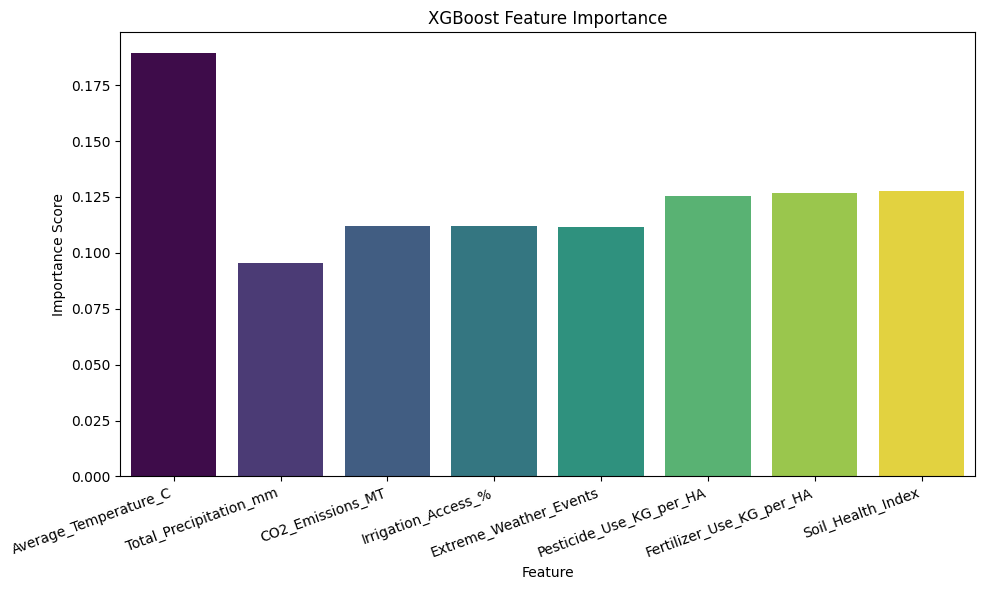

In [ ]:

xgb_model = XGBRegressor(max_depth=11, learning_rate=0.1, n_estimators=1000, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
print("XGBoost R² Score:", r2_score(y_test, y_pred))
print("XGBoost MSE:", mean_squared_error(y_test, y_pred))

print("🔹 XGBoost")
y_pred_xgb_test = xgb_model.predict(X_test)
y_pred_xgb_train = xgb_model.predict(X_train)

print("Train R²:", r2_score(y_train, y_pred_xgb_train))
print("Train MSE:", mean_squared_error(y_train, y_pred_xgb_train))
print("Test R²:", r2_score(y_test, y_pred_xgb_test))
print("Test MSE:", mean_squared_error(y_test, y_pred_xgb_test))


importance = xgb_model.feature_importances_
features = xgb_model.get_booster().feature_names


feat_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
})


colors = plt.cm.viridis(np.linspace(0, 1, len(features)))
color_list = [colors[i] for i in range(len(features))]

plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Importance', data=feat_df, palette=color_list)
plt.xticks(rotation=20, ha='right')
plt.title("XGBoost Feature Importance")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


In [ ]:
X=sm.add_constant(X)
lr_model=sm.OLS(y,X).fit()
print(lr_model.summary())
print(lr_model.params)

print("\n🔹 Multiple Linear Regression (MLR)")

mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

y_pred_mlr_train = mlr_model.predict(X_train)
y_pred_mlr_test = mlr_model.predict(X_test)

print("Train R²:", r2_score(y_train, y_pred_mlr_train))
print("Train MSE:", mean_squared_error(y_train, y_pred_mlr_train))
print("Test R²:", r2_score(y_test, y_pred_mlr_test))
print("Test MSE:", mean_squared_error(y_test, y_pred_mlr_test))


                             OLS Regression Results                             
Dep. Variable:     Crop_Yield_MT_per_HA   R-squared:                       0.045
Model:                              OLS   Adj. R-squared:                  0.045
Method:                   Least Squares   F-statistic:                     142.4
Date:                  Fri, 25 Apr 2025   Prob (F-statistic):          5.78e-235
Time:                          23:16:17   Log-Likelihood:                -33474.
No. Observations:                 24001   AIC:                         6.697e+04
Df Residuals:                     23992   BIC:                         6.704e+04
Df Model:                             8                                         
Covariance Type:              nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
cons

In [ ]:
results = pd.DataFrame({
    'Model': ['XGBoost', 'Multiple Linear Regression (MLR)', 'Random Forest'],
    'Train R²': [
        r2_score(y_train, y_pred_xgb_train),
        r2_score(y_train, y_pred_mlr_train),
        r2_score(y_train, y_pred_rf_train)
    ],
    'Test R²': [
        r2_score(y_test, y_pred_xgb_test),
        r2_score(y_test, y_pred_mlr_test),
        r2_score(y_test, y_pred_rf_test)
    ],
    'Train MSE': [
        mean_squared_error(y_train, y_pred_xgb_train),
        mean_squared_error(y_train, y_pred_mlr_train),
        mean_squared_error(y_train, y_pred_rf_train)
    ],
    'Test MSE': [
        mean_squared_error(y_test, y_pred_xgb_test),
        mean_squared_error(y_test, y_pred_mlr_test),
        mean_squared_error(y_test, y_pred_rf_test)
    ]
})

display(results)


,Model,Train R²,Test R²,Train MSE,Test MSE
0,XGBoost,0.999991,0.586524,0.000009,0.409406
1,Multiple Linear Regression (MLR),0.046294,0.040828,0.953498,0.949731
2,Random Forest,0.936947,0.540020,0.063040,0.455453


now we'll try on 0.3 test size for the three models

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Mean Squared Error: 0.6855493400081116
R-squared: 0.3086906266044862

🔹 Random Forest
Train R²: 0.9310056913146066
Train MSE: 0.06903306343979763
Test R²: 0.508361251740943
Test MSE: 0.4875423831387585


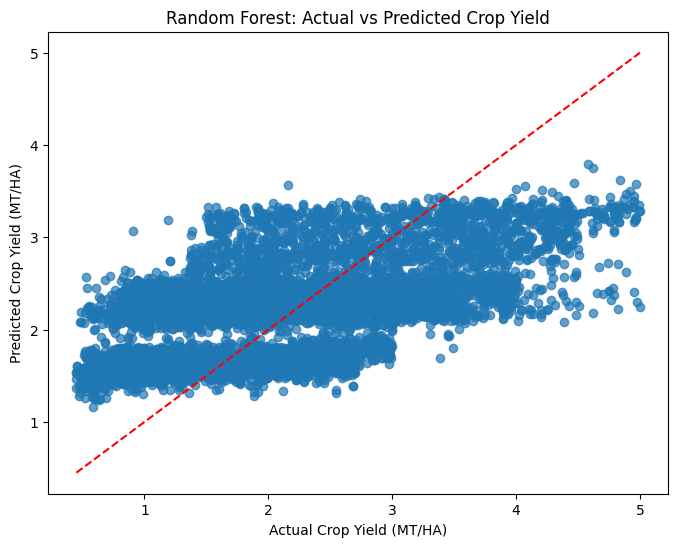

In [ ]:



rf_model = RandomForestRegressor(n_estimators=1000,max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print("\n🔹 Random Forest")

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf_test = rf_model.predict(X_test)
y_pred_rf_train = rf_model.predict(X_train)

print("Train R²:", r2_score(y_train, y_pred_rf_train))
print("Train MSE:", mean_squared_error(y_train, y_pred_rf_train))
print("Test R²:", r2_score(y_test, y_pred_rf_test))
print("Test MSE:", mean_squared_error(y_test, y_pred_rf_test))

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Identity line
plt.xlabel("Actual Crop Yield (MT/HA)")
plt.ylabel("Predicted Crop Yield (MT/HA)")
plt.title("Random Forest: Actual vs Predicted Crop Yield")
plt.show()


XGBoost R² Score: 0.5471441641468564
XGBoost MSE: 0.44908261240995206
🔹 XGBoost
Train R²: 0.9999923405436323
Train MSE: 7.663758756641387e-06
Test R²: 0.5471441641468564
Test MSE: 0.44908261240995206


<ipython-input-147-13d7eb62b62d>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Importance', data=feat_df, palette=colors)
<ipython-input-147-13d7eb62b62d>:28: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x='Feature', y='Importance', data=feat_df, palette=colors)


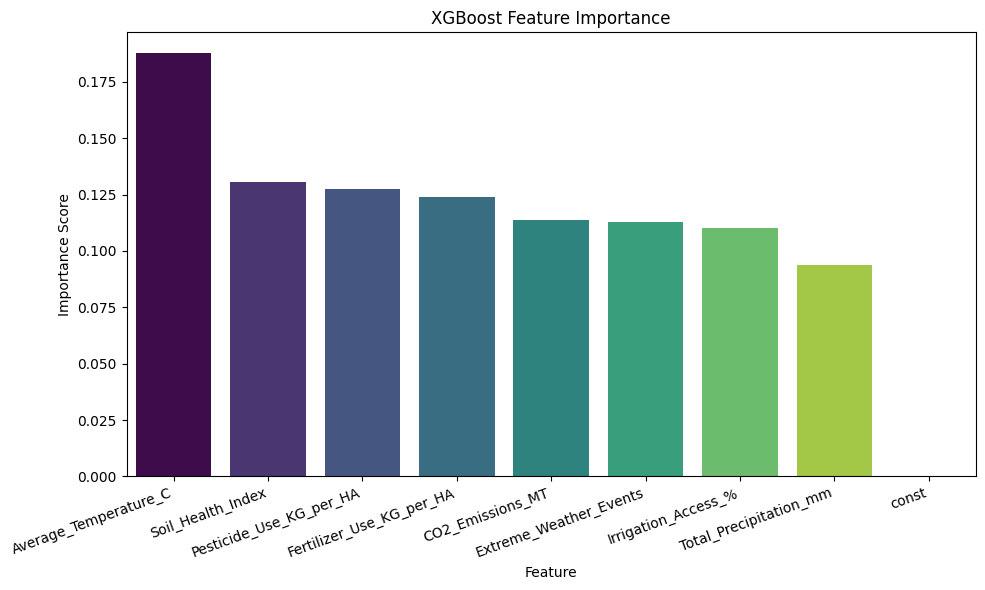

In [ ]:
# Train model
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=11, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = xgb_model.predict(X_test)
print("XGBoost R² Score:", r2_score(y_test, y_pred))
print("XGBoost MSE:", mean_squared_error(y_test, y_pred))
print("🔹 XGBoost")
y_pred_xgb_test = xgb_model.predict(X_test)
y_pred_xgb_train = xgb_model.predict(X_train)

print("Train R²:", r2_score(y_train, y_pred_xgb_train))
print("Train MSE:", mean_squared_error(y_train, y_pred_xgb_train))
print("Test R²:", r2_score(y_test, y_pred_xgb_test))
print("Test MSE:", mean_squared_error(y_test, y_pred_xgb_test))

# Feature importance
importance = xgb_model.feature_importances_
features = X.columns
feat_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Colored barplot
colors = plt.cm.viridis(np.linspace(0, 1, len(feat_df)))

plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Importance', data=feat_df, palette=colors)
plt.xticks(rotation=20, ha='right')
plt.title("XGBoost Feature Importance")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


In [ ]:
X=sm.add_constant(X)
lr_model=sm.OLS(y,X).fit()
print(lr_model.summary())
print(lr_model.params)

print("\n🔹 Multiple Linear Regression (MLR)")

mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

y_pred_mlr_train = mlr_model.predict(X_train)
y_pred_mlr_test = mlr_model.predict(X_test)

print("Train R²:", r2_score(y_train, y_pred_mlr_train))
print("Train MSE:", mean_squared_error(y_train, y_pred_mlr_train))
print("Test R²:", r2_score(y_test, y_pred_mlr_test))
print("Test MSE:", mean_squared_error(y_test, y_pred_mlr_test))

                             OLS Regression Results                             
Dep. Variable:     Crop_Yield_MT_per_HA   R-squared:                       0.045
Model:                              OLS   Adj. R-squared:                  0.045
Method:                   Least Squares   F-statistic:                     142.4
Date:                  Fri, 25 Apr 2025   Prob (F-statistic):          5.78e-235
Time:                          23:20:29   Log-Likelihood:                -33474.
No. Observations:                 24001   AIC:                         6.697e+04
Df Residuals:                     23992   BIC:                         6.704e+04
Df Model:                             8                                         
Covariance Type:              nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
cons

In [ ]:
results = pd.DataFrame({
    'Model': ['XGBoost', 'Multiple Linear Regression (MLR)', 'Random Forest'],
    'Train R²': [
        r2_score(y_train, y_pred_xgb_train),
        r2_score(y_train, y_pred_mlr_train),
        r2_score(y_train, y_pred_rf_train)
    ],
    'Test R²': [
        r2_score(y_test, y_pred_xgb_test),
        r2_score(y_test, y_pred_mlr_test),
        r2_score(y_test, y_pred_rf_test)
    ],
    'Train MSE': [
        mean_squared_error(y_train, y_pred_xgb_train),
        mean_squared_error(y_train, y_pred_mlr_train),
        mean_squared_error(y_train, y_pred_rf_train)
    ],
    'Test MSE': [
        mean_squared_error(y_test, y_pred_xgb_test),
        mean_squared_error(y_test, y_pred_mlr_test),
        mean_squared_error(y_test, y_pred_rf_test)
    ]
})

display(results)


,Model,Train R²,Test R²,Train MSE,Test MSE
0,XGBoost,0.999992,0.547144,0.000008,0.449083
1,Multiple Linear Regression (MLR),0.046632,0.041894,0.953904,0.950123
2,Random Forest,0.931006,0.508361,0.069033,0.487542


XGBoost R² Score: 0.2934269863258795
XGBoost MSE: 0.7006858026713098
🔹 XGBoost
Train R²: 0.47288460454840964
Train MSE: 0.5274114811444928
Test R²: 0.2934269863258795
Test MSE: 0.7006858026713098


<ipython-input-150-46e6088bb5a1>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Importance', data=feat_df, palette=colors)
<ipython-input-150-46e6088bb5a1>:29: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x='Feature', y='Importance', data=feat_df, palette=colors)


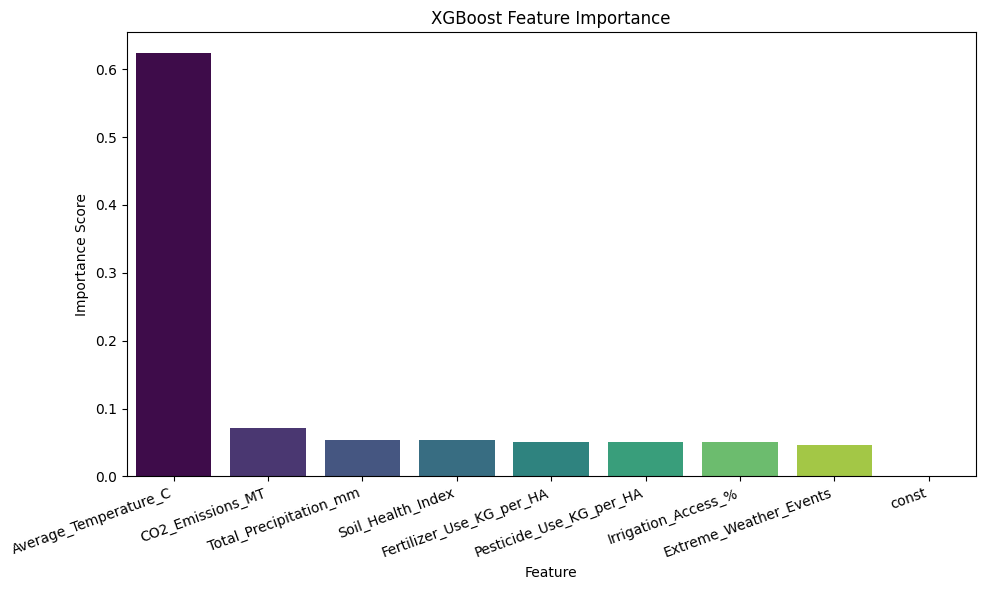

In [ ]:

# Train model
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_test)
print("XGBoost R² Score:", r2_score(y_test, y_pred))
print("XGBoost MSE:", mean_squared_error(y_test, y_pred))
print("🔹 XGBoost")
y_pred_xgb_test = xgb_model.predict(X_test)
y_pred_xgb_train = xgb_model.predict(X_train)

print("Train R²:", r2_score(y_train, y_pred_xgb_train))
print("Train MSE:", mean_squared_error(y_train, y_pred_xgb_train))
print("Test R²:", r2_score(y_test, y_pred_xgb_test))
print("Test MSE:", mean_squared_error(y_test, y_pred_xgb_test))

# Feature importance (sorted + colored)
importance = xgb_model.feature_importances_
features = X.columns
feat_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Color palette
colors = plt.cm.viridis(np.linspace(0, 1, len(feat_df)))

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Importance', data=feat_df, palette=colors)
plt.xticks(rotation=20, ha='right')
plt.title("XGBoost Feature Importance")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()



XGBoost R² Score: 0.5718770481179178
XGBoost MSE: 0.42390893499901827
🔹 XGBoost
Train R²: 0.9999910418798416
Train MSE: 8.956173407748683e-06
Test R²: 0.5718770481179178
Test MSE: 0.42390893499901827


<ipython-input-151-83fb71bbebc0>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Importance', data=feat_df, palette=color_list)


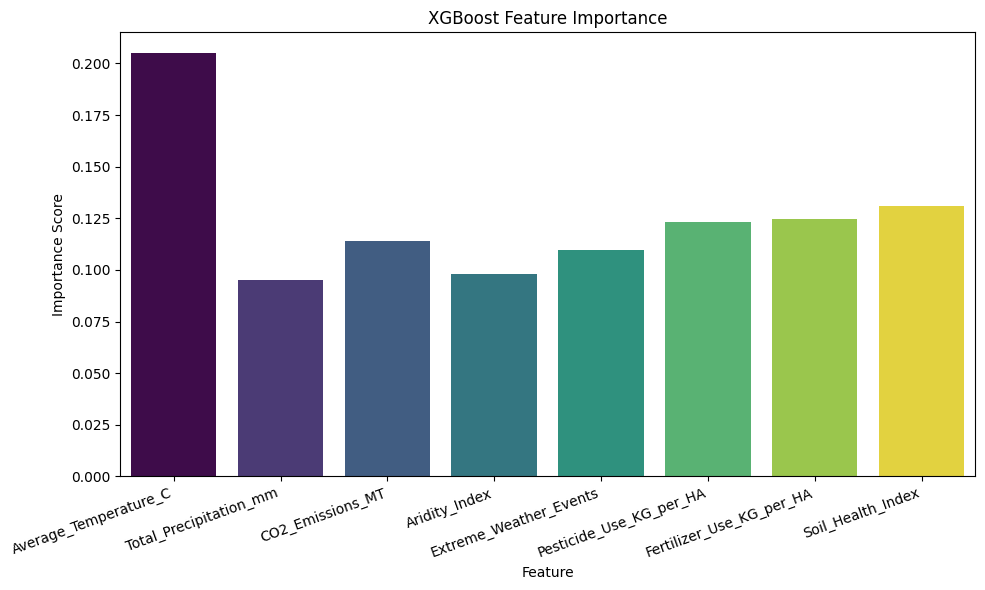

In [ ]:
X = cropsdata[['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT',
               'Aridity_Index', 'Extreme_Weather_Events',
               'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA',
               'Soil_Health_Index']]

y = cropsdata['Crop_Yield_MT_per_HA']

# Split into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =============================
# Train XGBoost
# =============================
xgb_model = XGBRegressor(max_depth=11, learning_rate=0.1, n_estimators=1000, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_test)
print("XGBoost R² Score:", r2_score(y_test, y_pred))
print("XGBoost MSE:", mean_squared_error(y_test, y_pred))
print("🔹 XGBoost")
y_pred_xgb_test = xgb_model.predict(X_test)
y_pred_xgb_train = xgb_model.predict(X_train)

print("Train R²:", r2_score(y_train, y_pred_xgb_train))
print("Train MSE:", mean_squared_error(y_train, y_pred_xgb_train))
print("Test R²:", r2_score(y_test, y_pred_xgb_test))
print("Test MSE:", mean_squared_error(y_test, y_pred_xgb_test))

# =============================
# Feature Importance Plot (Colored Bars)
# =============================

# Get feature importances and names
importance = xgb_model.feature_importances_
features = xgb_model.get_booster().feature_names

# Create DataFrame for seaborn
feat_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
})

# Create a color map
colors = plt.cm.viridis(np.linspace(0, 1, len(features)))
color_list = [colors[i] for i in range(len(features))]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Importance', data=feat_df, palette=color_list)
plt.xticks(rotation=20, ha='right')
plt.title("XGBoost Feature Importance")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


**Now we'll remove the normalization and data augmentation**




In [ ]:
#we start by loading our dataset that include various information about climate change for different crops types
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/climate_change_impact_on_agriculture_2024.csv')
lat_long = pd.read_csv('/content/drive/MyDrive/longitude-latitude.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import statsmodels.api as sm
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

**We'll test all of the three models using the 80/20 split(without any preprocessing)**

In [ ]:
Y2=df['Crop_Yield_MT_per_HA']
X2 = df[['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT','Irrigation_Access_%','Extreme_Weather_Events','Pesticide_Use_KG_per_HA','Fertilizer_Use_KG_per_HA','Soil_Health_Index']]  # You can add more features here
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)

In [ ]:
lr_model=sm.OLS(Y2,X2).fit()
X2 = sm.add_constant(X2)
print(lr_model.summary())
print(lr_model.params)

print("\n🔹 Multiple Linear Regression (MLR)")
mlr_model = LinearRegression()
mlr_model.fit(X2_train, y2_train)

y2_pred_mlr_train = mlr_model.predict(X2_train)
y2_pred_mlr_test = mlr_model.predict(X2_test)
# Overall performance on the entire dataset
y2_pred_all = rf_model.predict(X2)
print("Overall R²:", r2_score(Y2, y2_pred_all))
print("Overall MSE:", mean_squared_error(Y2, y2_pred_all))

print("Train R²:", r2_score(y2_train, y2_pred_mlr_train))
print("Train MSE:", mean_squared_error(y2_train, y2_pred_mlr_train))
print("Test R²:", r2_score(y2_test, y2_pred_mlr_test))
print("Test MSE:", mean_squared_error(y2_test, y2_pred_mlr_test))


                                  OLS Regression Results                                 
Dep. Variable:     Crop_Yield_MT_per_HA   R-squared (uncentered):                   0.828
Model:                              OLS   Adj. R-squared (uncentered):              0.828
Method:                   Least Squares   F-statistic:                              6006.
Date:                  Fri, 25 Apr 2025   Prob (F-statistic):                        0.00
Time:                          23:21:19   Log-Likelihood:                         -14363.
No. Observations:                 10000   AIC:                                  2.874e+04
Df Residuals:                      9992   BIC:                                  2.880e+04
Df Model:                             8                                                  
Covariance Type:              nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
-------

Overall R²: 0.4709304961811449
Overall MSE: 0.5272633219124933

🔹 Random Forest
Train R²: 0.5108471212501122
Train MSE: 0.4801322236097168
Test R²: 0.3218315877482345
Test MSE: 0.7157877151235991


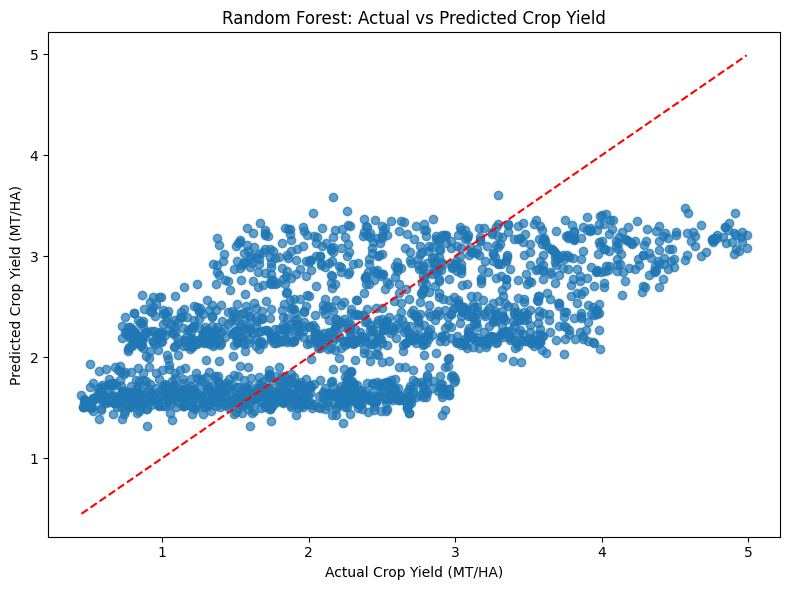

In [ ]:

rf_model = RandomForestRegressor(n_estimators=1000, max_depth=10, random_state=42)
rf_model.fit(X2_train, y2_train)

# Predict
y2_pred_rf_test = rf_model.predict(X2_test)
y2_pred_rf_train = rf_model.predict(X2_train)
# Overall performance on the entire dataset
# The error was here: X2 had an extra 'const' column not seen during training
# Solution: Use the original X2 (without 'const') or add 'const' to X2_train as well
y2_pred_all = rf_model.predict(X2.drop(columns=['const'], errors='ignore')) # Drop 'const' if it exists
print("Overall R²:", r2_score(Y2, y2_pred_all))
print("Overall MSE:", mean_squared_error(Y2, y2_pred_all))

# Evaluate
print("\n🔹 Random Forest")
print("Train R²:", r2_score(y2_train, y2_pred_rf_train))
print("Train MSE:", mean_squared_error(y2_train, y2_pred_rf_train))
print("Test R²:", r2_score(y2_test, y2_pred_rf_test))
print("Test MSE:", mean_squared_error(y2_test, y2_pred_rf_test))

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(y2_test, y2_pred_rf_test, alpha=0.7)
plt.plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Crop Yield (MT/HA)")
plt.ylabel("Predicted Crop Yield (MT/HA)")
plt.title("Random Forest: Actual vs Predicted Crop Yield")
plt.tight_layout()
plt.show()

XGBoost R² Score: 0.23177032014177823
XGBoost MSE: 0.8108448540238228
🔹 XGBoost
Train R²: 0.9999940201382468
Train MSE: 5.869584837728738e-06
Test R²: 0.23177032014177823
Test MSE: 0.8108448540238228


<ipython-input-157-1fed3ca81f4e>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Importance', data=feat_df, palette=color_list)


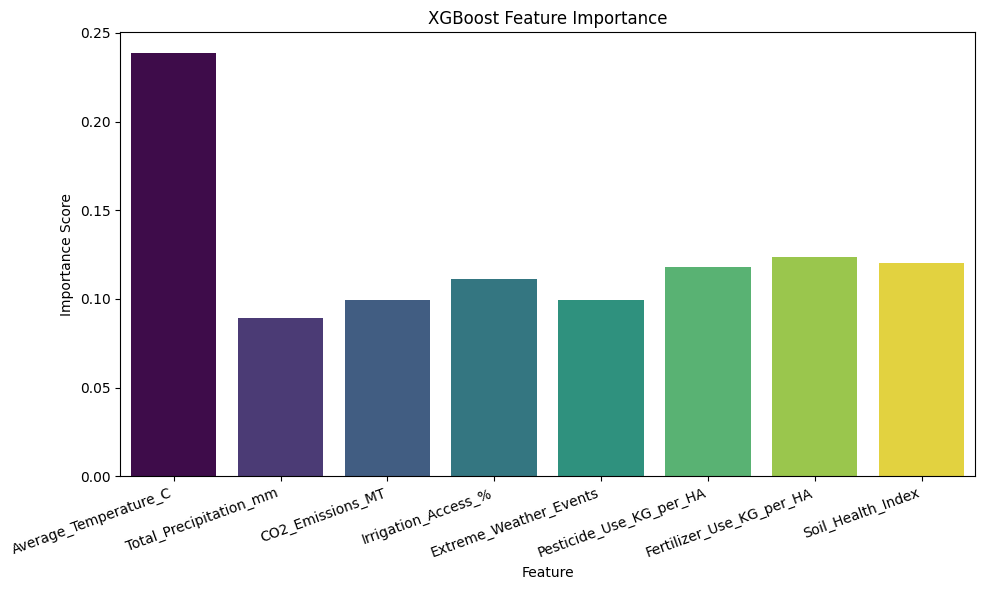

In [ ]:
xgb_model = XGBRegressor(max_depth=11, learning_rate=0.1, n_estimators=1000, random_state=42)
xgb_model.fit(X2_train, y2_train)


y2_pred = xgb_model.predict(X2_test)
print("XGBoost R² Score:", r2_score(y2_test, y2_pred))
print("XGBoost MSE:", mean_squared_error(y2_test, y2_pred))
print("🔹 XGBoost")
y2_pred_xgb_test = xgb_model.predict(X2_test)
y2_pred_xgb_train = xgb_model.predict(X2_train)

print("Train R²:", r2_score(y2_train, y2_pred_xgb_train))
print("Train MSE:", mean_squared_error(y2_train, y2_pred_xgb_train))
print("Test R²:", r2_score(y2_test, y2_pred_xgb_test))
print("Test MSE:", mean_squared_error(y2_test, y2_pred_xgb_test))



importance = xgb_model.feature_importances_
features = xgb_model.get_booster().feature_names

feat_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
})

colors = plt.cm.viridis(np.linspace(0, 1, len(features)))
color_list = [colors[i] for i in range(len(features))]


plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Importance', data=feat_df, palette=color_list)
plt.xticks(rotation=20, ha='right')
plt.title("XGBoost Feature Importance")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


In [ ]:
results = pd.DataFrame({
    'Model': ['XGBoost', 'Multiple Linear Regression (MLR)', 'Random Forest'],
    'Train R²': [
        r2_score(y2_train, y2_pred_xgb_train),
        r2_score(y2_train, y2_pred_mlr_train),
        r2_score(y2_train, y2_pred_rf_train)
    ],
    'Test R²': [
        r2_score(y2_test, y2_pred_xgb_test),
        r2_score(y2_test, y2_pred_mlr_test),
        r2_score(y2_test, y2_pred_rf_test)
    ],
    'Train MSE': [
        mean_squared_error(y2_train, y2_pred_xgb_train),
        mean_squared_error(y2_train, y2_pred_mlr_train),
        mean_squared_error(y2_train, y2_pred_rf_train)
    ],
    'Test MSE': [
        mean_squared_error(y2_test, y2_pred_xgb_test),
        mean_squared_error(y2_test, y2_pred_mlr_test),
        mean_squared_error(y2_test, y2_pred_rf_test)
    ]
})

display(results)

,Model,Train R²,Test R²,Train MSE,Test MSE
0,XGBoost,0.999994,0.231770,0.000006,0.810845
1,Multiple Linear Regression (MLR),0.080672,0.067653,0.902374,0.984066
2,Random Forest,0.510847,0.321832,0.480132,0.715788


**now we'll try the 0.3 test split but this time without any norm/aug as well (preprocessing)**

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.3, random_state=42)

In [ ]:
lr_model=sm.OLS(Y2,X2).fit()
X2 = sm.add_constant(X2)
print(lr_model.summary())
print(lr_model.params)

print("\n🔹 Multiple Linear Regression (MLR)")
mlr_model = LinearRegression()
mlr_model.fit(X2_train, y2_train)

y2_pred_mlr_train = mlr_model.predict(X2_train)
y2_pred_mlr_test = mlr_model.predict(X2_test)
# Overall performance on the entire dataset
y2_pred_all = rf_model.predict(X2.drop(columns=['const'], errors='ignore'))
print("Overall R²:", r2_score(Y2, y2_pred_all))
print("Overall MSE:", mean_squared_error(Y2, y2_pred_all))

print("Train R²:", r2_score(y2_train, y2_pred_mlr_train))
print("Train MSE:", mean_squared_error(y2_train, y2_pred_mlr_train))
print("Test R²:", r2_score(y2_test, y2_pred_mlr_test))
print("Test MSE:", mean_squared_error(y2_test, y2_pred_mlr_test))


                             OLS Regression Results                             
Dep. Variable:     Crop_Yield_MT_per_HA   R-squared:                       0.078
Model:                              OLS   Adj. R-squared:                  0.078
Method:                   Least Squares   F-statistic:                     106.2
Date:                  Fri, 25 Apr 2025   Prob (F-statistic):          9.05e-171
Time:                          23:23:03   Log-Likelihood:                -13764.
No. Observations:                 10000   AIC:                         2.755e+04
Df Residuals:                      9991   BIC:                         2.761e+04
Df Model:                             8                                         
Covariance Type:              nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
cons

Overall R²: 0.4588650204629836
Overall MSE: 0.5392876074963217

🔹 Random Forest
Train R²: 0.5289475671357506
Train MSE: 0.46487075013177653
Test R²: 0.2999816828042453
Test MSE: 0.712926941346927


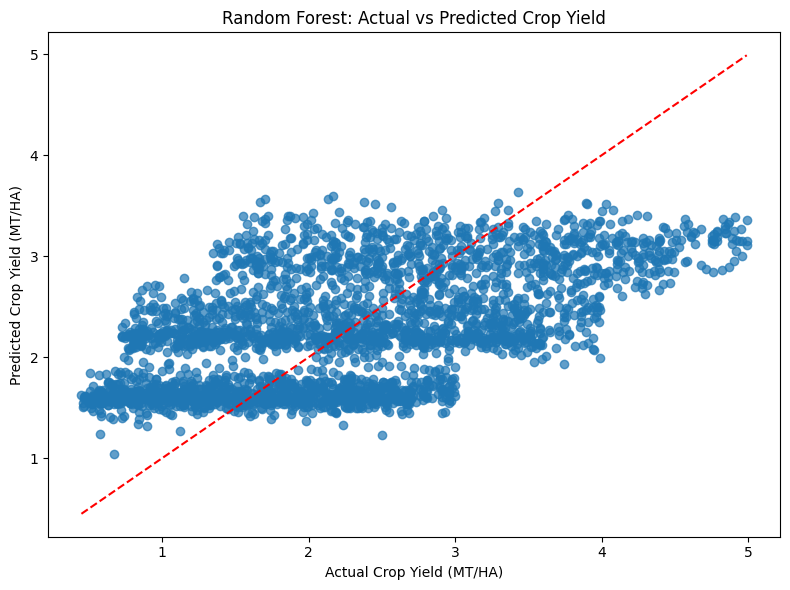

In [ ]:
# Import necessary libraries

# Define features (X) and target (y)


# Train-test split
# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=1000, max_depth=10, random_state=42)
rf_model.fit(X2_train, y2_train)

# Predict
y2_pred_rf_test = rf_model.predict(X2_test)
y2_pred_rf_train = rf_model.predict(X2_train)

y2_pred_all = rf_model.predict(X2) # Drop 'const' if it exists
print("Overall R²:", r2_score(Y2, y2_pred_all))
print("Overall MSE:", mean_squared_error(Y2, y2_pred_all))

# Evaluate
print("\n🔹 Random Forest")
print("Train R²:", r2_score(y2_train, y2_pred_rf_train))
print("Train MSE:", mean_squared_error(y2_train, y2_pred_rf_train))
print("Test R²:", r2_score(y2_test, y2_pred_rf_test))
print("Test MSE:", mean_squared_error(y2_test, y2_pred_rf_test))

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(y2_test, y2_pred_rf_test, alpha=0.7)
plt.plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Crop Yield (MT/HA)")
plt.ylabel("Predicted Crop Yield (MT/HA)")
plt.title("Random Forest: Actual vs Predicted Crop Yield")
plt.tight_layout()
plt.show()

XGBoost R² Score: 0.21540781679340748
XGBoost MSE: 0.7990603840467277
🔹 XGBoost
Train R²: 0.9999940468224043
Train MSE: 5.875053266813495e-06
Test R²: 0.21540781679340748
Test MSE: 0.7990603840467277


<ipython-input-162-68a8b4a6629c>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Importance', data=feat_df, palette=color_list)


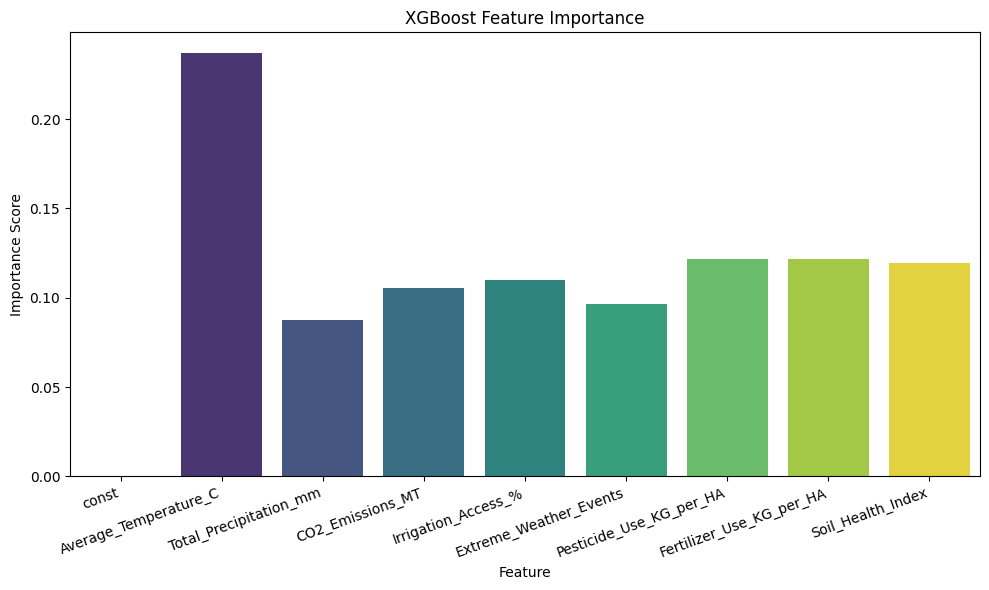

In [ ]:
xgb_model = XGBRegressor(max_depth=11, learning_rate=0.1, n_estimators=1000, random_state=42)
xgb_model.fit(X2_train, y2_train)

y2_pred = xgb_model.predict(X2_test)
print("XGBoost R² Score:", r2_score(y2_test, y2_pred))
print("XGBoost MSE:", mean_squared_error(y2_test, y2_pred))
print("🔹 XGBoost")
y2_pred_xgb_test = xgb_model.predict(X2_test)
y2_pred_xgb_train = xgb_model.predict(X2_train)

print("Train R²:", r2_score(y2_train, y2_pred_xgb_train))
print("Train MSE:", mean_squared_error(y2_train, y2_pred_xgb_train))
print("Test R²:", r2_score(y2_test, y2_pred_xgb_test))
print("Test MSE:", mean_squared_error(y2_test, y2_pred_xgb_test))


importance = xgb_model.feature_importances_
features = xgb_model.get_booster().feature_names

feat_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
})

colors = plt.cm.viridis(np.linspace(0, 1, len(features)))
color_list = [colors[i] for i in range(len(features))]


plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Importance', data=feat_df, palette=color_list)
plt.xticks(rotation=20, ha='right')
plt.title("XGBoost Feature Importance")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


In [ ]:
results = pd.DataFrame({
    'Model': ['XGBoost', 'Multiple Linear Regression (MLR)', 'Random Forest'],
    'Train R²': [
        r2_score(y2_train, y2_pred_xgb_train),
        r2_score(y2_train, y2_pred_mlr_train),
        r2_score(y2_train, y2_pred_rf_train)
    ],
    'Test R²': [
        r2_score(y2_test, y2_pred_xgb_test),
        r2_score(y2_test, y2_pred_mlr_test),
        r2_score(y2_test, y2_pred_rf_test)
    ],
    'Train MSE': [
        mean_squared_error(y2_train, y2_pred_xgb_train),
        mean_squared_error(y2_train, y2_pred_mlr_train),
        mean_squared_error(y2_train, y2_pred_rf_train)
    ],
    'Test MSE': [
        mean_squared_error(y2_test, y2_pred_xgb_test),
        mean_squared_error(y2_test, y2_pred_mlr_test),
        mean_squared_error(y2_test, y2_pred_rf_test)
    ]
})

display(results)

,Model,Train R²,Test R²,Train MSE,Test MSE
0,XGBoost,0.999994,0.215408,0.000006,0.799060
1,Multiple Linear Regression (MLR),0.081765,0.068724,0.906184,0.948449
2,Random Forest,0.528948,0.299982,0.464871,0.712927
